# Imports

In [663]:
import re
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
from scipy.spatial import ConvexHull, Voronoi, voronoi_plot_2d
from matplotlib.patches import Ellipse
import pingouin as pg
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, MO
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import warnings
import matplotlib.cbook
import matplotlib.dates as mdates
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import seaborn as sns
sns.set_theme(style="white")

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score,r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBRFClassifier

In [664]:
# Add project root to sys.path so you can import path_config regardless of notebook location
sys.path.append(str(Path.cwd().parents[2]))  # adjust depth as needed if notebook is deep in folders

from path_config import project_path, project_data_sources_path, project_data_exports_path

print(f'project_path: {project_path}')
print(f'project_data_sources_path: {project_data_sources_path}')
print(f'project_data_exports_path: {project_data_exports_path}')

project_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football
project_data_sources_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/sources
project_data_exports_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/exports


In [665]:
# project_path = Path.cwd()
# print(f'project_path: {project_path}')
# print('')
# project_data_sources_path = Path.cwd() / 'data' / 'sources'
# print(f'project_data_sources_path: {project_data_sources_path}')
# print('')
# project_data_exports_path = Path.cwd() / 'data' / 'exports'
# print(f'project_data_exports_path: {project_data_exports_path}')

# User Defined Functions

## Dataset Import and Wrangling

In [666]:
def load_game_results_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'game_results_df.csv',
        # sheet_name='Sheet1 (2)',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [667]:
def load_passing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'passing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [668]:
def load_receiving_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'receiving_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [669]:
def load_rushing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'rushing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [670]:
def load_spotrac_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_salary_cap_data_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [671]:
def load_nfl_season_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'nfl_season_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [672]:
def load_spotrac_nfl_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [673]:
def load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_one_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [674]:
def load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_two_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [675]:
def load_spotrac_nfl_team_pos_level_one_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_one_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [676]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [677]:
def load_team_season_records_stats_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'team_season_records_stats_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [678]:
def load_spotrac_nfl_team_season_roster_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [679]:
def load_spotrac_nfl_team_season_roster_pos_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_pos_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [680]:
def load_spotrac_nfl_team_season_roster_position_level_one_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_one_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [681]:
def load_spotrac_nfl_team_season_roster_position_level_two_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_two_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

## Clustering

### PCA

In [682]:
def pca_cumsum_exp_var_ratios(df, numerical_features, categorical_features=None, use_categorical_features=False):
    """
    Calculate and create a dataframe containing each feature's explained variance ratio
    and the cumulative sum of explained variance ratios.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.

    Returns:
        pd.DataFrame: A dataframe containing the explained variance ratio and its cumulative sum.
    """
    pca_feature_exp_var = []
    pca_feature_cumsum_exp_var = []
    pca_qty = []

    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Build the pipeline with preprocessing and PCA
    pca_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(random_state=0))
    ]).fit(df)

    # Retrieve PCA components and explained variance ratios
    explained_variance_ratio = pca_pipeline.named_steps['pca'].explained_variance_ratio_
    cumulative_sum_exp_var = np.cumsum(explained_variance_ratio)

    # Populate the data
    pca_feature_exp_var.append(explained_variance_ratio)
    pca_feature_cumsum_exp_var.append(cumulative_sum_exp_var)
    pca_qty.append(list(range(1, len(explained_variance_ratio) + 1)))

    # Create a DataFrame
    pca_df = pd.DataFrame({
        'principal_component_qty': pca_qty,
        'feature_explained_variance': pca_feature_exp_var,
        'feature_cumsum_explained_variance': pca_feature_cumsum_exp_var,
    })

    # Explode the lists into rows
    pca_df = pca_df.explode(['principal_component_qty',
                             'feature_explained_variance',
                             'feature_cumsum_explained_variance']).reset_index(drop=True)

    return pca_df

In [683]:
def scree_plot(df):
    sns.set_theme(style='white')  # Set the theme of the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

    # Create the line plot
    sns.lineplot(
        data=df,
        x='principal_component_qty',
        y='feature_cumsum_explained_variance',
        ax=ax,
        marker='o',
        linestyle='-'
    )

    ax.set_title('Scree Plot, Cumulative Sum of PCA Explained Variance Ratios')  # Set the title
    ax.set_xlabel('Number of Principal Components')  # Set the x-axis label
    ax.set_ylabel('Cumulative Sum Explained Variance Ratios')  # Set the y-axis label

    return fig  # Return the figure object

In [684]:
def pca_matrix_heatmap(df, numerical_features, categorical_features=None, use_categorical_features=False, annotation_fontsize=7):
    """
    Generate a heatmap showing the squared PCA component matrix, highlighting feature contributions.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.
        annotation_fontsize (int): Font size for heatmap annotations. Default is 7.

    Returns:
        matplotlib.figure.Figure: The heatmap figure.
    """
    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Build the pipeline with preprocessing and PCA
    pca_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(random_state=0))
    ]).fit(df)

    # Get the squared PCA component matrix
    pca_components_squared = pca_pipe.named_steps['pca'].components_**2

    # Get feature names after preprocessing
    if use_categorical_features and categorical_features:
        feature_names = pca_pipe.named_steps['preprocessor'].get_feature_names_out()
    else:
        feature_names = numerical_features

    # Create the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    sns.heatmap(
        pca_components_squared,
        yticklabels=['PCA' + str(x) for x in range(1, pca_pipe.named_steps['pca'].n_components_ + 1)],
        xticklabels=feature_names,
        annot=True,
        fmt='.2f',
        square=True,
        linewidth=0.05,
        linecolor='white',
        cbar_kws={'orientation': 'vertical'},
        vmin=0,
        vmax=1,
        ax=ax,
        annot_kws={'size': annotation_fontsize}  # Set the font size for annotations
    )

    return fig

In [685]:
# def pca_matrix_heatmap(df, annotation_fontsize=7):
#     pca_pipe = Pipeline(steps=[
#         ('scaler', StandardScaler()),
#         ('pca', PCA(random_state=0))]).fit(df)
#     pca_pipe.named_steps['pca'].components_**2
#
#     fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#
#     sns.heatmap(
#         pca_pipe.named_steps['pca'].components_**2,
#         yticklabels=['PCA'+str(x) for x in range(1, pca_pipe.named_steps['pca'].n_components_+1)],
#         xticklabels=list(df.columns),
#         annot=True,
#         fmt='.2f',
#         square=True,
#         linewidth=0.05,
#         linecolor='white',
#         cbar_kws={'orientation': 'vertical'},
#         vmin=0,
#         vmax=1,
#         ax=ax,
#         annot_kws={'size': annotation_fontsize}  # Set the font size for annotations
#     )
#     return fig


In [686]:
def kmc_pca_cluster_df(df, numerical_features, categorical_features=None, components=3, clusters=3, use_categorical_features=False):
    """
    Calculate and create a dataframe containing the first three principal components
    and the associated cluster label.

    Parameters:
        df (DataFrame): The input dataframe containing the features for clustering.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        components (int): Number of PCA components to compute.
        clusters (int): Number of clusters for KMeans clustering.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.

    Returns:
        tuple: A DataFrame with principal components and cluster labels, and centroid coordinates (x, y, [z]).
    """
    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Build the pipeline with preprocessing, PCA, and clustering
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(random_state=0, n_components=components)),
        ('clusterer', KMeans(random_state=0, n_clusters=clusters))
    ])

    pipe.fit(df)

    # Extract cluster labels and convert to string
    labels = pipe.named_steps['clusterer'].labels_.astype(str)

    # Transform the data using the scaler and PCA steps
    transformed_data = pipe[:2].transform(df)
    pc_1 = transformed_data[:, 0]
    pc_2 = transformed_data[:, 1]
    pc_3 = transformed_data[:, 2] if components > 2 else None  # Ensure components > 2 for 3D compatibility

    # Obtain centroids in the PCA-transformed space
    centroids = pipe.named_steps['clusterer'].cluster_centers_
    centroids_x = centroids[:, 0]
    centroids_y = centroids[:, 1]
    centroids_z = centroids[:, 2] if components > 2 else None

    # Construct dataframe with three principal components and cluster labels
    cluster_dict = {
        'pc_1': pc_1,
        'pc_2': pc_2,
        'pc_3': pc_3,
        'label': labels
    }
    cluster_df = pd.DataFrame(cluster_dict)

    # Return centroids_z if available for 3D plotting support
    if centroids_z is not None:
        return cluster_df, centroids_x, centroids_y, centroids_z
    else:
        return cluster_df, centroids_x, centroids_y

In [687]:
def gmm_pca_cluster_df(df, numerical_features, categorical_features=None, components=3, clusters=3, use_categorical_features=False):
    """
    Calculate and create a dataframe containing the first three principal components
    and associated cluster labels using Gaussian Mixture Modeling (GMM).

    Parameters:
        df (DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        components (int): Number of PCA components to compute.
        clusters (int): Number of clusters for GMM clustering.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.

    Returns:
        tuple: A DataFrame with principal components, cluster labels, posterior probabilities,
               and centroid coordinates (x, y, [z]).
    """
    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Create pipeline with preprocessing and PCA steps
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=components, random_state=0))
    ])

    # Fit and transform the data
    pipe.fit(df)
    transformed_data = pipe.transform(df)

    # Fit Gaussian Mixture Model (GMM) to the PCA-transformed data
    gmm = GaussianMixture(n_components=clusters, random_state=0)
    gmm.fit(transformed_data)

    # Get posterior probabilities and cluster labels
    posterior_probs = gmm.predict_proba(transformed_data)
    labels = gmm.predict(transformed_data).astype(str)

    # Extract the principal components
    pc_1 = transformed_data[:, 0]
    pc_2 = transformed_data[:, 1]
    pc_3 = transformed_data[:, 2] if components > 2 else None  # Include pc_3 if available

    # Get GMM means (centroids) in the PCA space
    centroids_x = gmm.means_[:, 0]
    centroids_y = gmm.means_[:, 1]
    centroids_z = gmm.means_[:, 2] if components > 2 else None  # Include z-centroids if available

    # Construct the output dictionary
    cluster_dict = {
        'pc_1': pc_1,
        'pc_2': pc_2,
        'pc_3': pc_3,
        'label': labels
    }

    # Add each cluster's posterior probability as a column
    for i in range(clusters):
        cluster_dict[f'cluster_{i}_probability'] = posterior_probs[:, i]

    # Create the output dataframe
    cluster_df = pd.DataFrame(cluster_dict)

    # Return centroids_z if available for 3D plotting support
    if centroids_z is not None:
        return cluster_df, centroids_x, centroids_y, centroids_z
    else:
        return cluster_df, centroids_x, centroids_y

In [688]:
def dbscan_pca_cluster_df(
    df,
    numerical_features,
    categorical_features=None,
    components=5,
    eps=0.5,
    min_samples=5,
    use_categorical_features=False,
    random_state=0
):
    """
    Compute a PCA transformation and perform DBSCAN clustering, returning a DataFrame
    that includes the principal components and the cluster labels.

    Note: DBSCAN does not compute centroids.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list, optional): List of categorical feature column names. Default is None.
        components (int): Number of PCA components to compute. Default is 5.
        eps (float): The maximum distance between two samples for them to be considered neighbors.
                     Default is 0.5.
        min_samples (int): The number of samples in a neighborhood for a point to be considered a core point.
                          Default is 5.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.
        random_state (int): Random state for reproducibility in PCA. Default is 0.

    Returns:
        pd.DataFrame: A DataFrame with the first 'components' principal components and the cluster label.

    Raises:
        ValueError: If numerical_features is empty, components exceeds the number of features after preprocessing,
                    or input data is invalid.
    """
    # Input validation
    if not numerical_features or not all(col in df.columns for col in numerical_features):
        raise ValueError("numerical_features must be a non-empty list of valid column names")
    if use_categorical_features and (not categorical_features or not all(col in df.columns for col in categorical_features)):
        raise ValueError("categorical_features must be a non-empty list of valid column names when use_categorical_features is True")
    if df[numerical_features].isnull().any().any():
        raise ValueError("Numerical features contain missing values")
    if use_categorical_features and df[categorical_features].isnull().any().any():
        raise ValueError("Categorical features contain missing values")
    if components < 1 or not isinstance(components, int):
        raise ValueError("components must be a positive integer")
    if eps <= 0 or not isinstance(eps, (int, float)):
        raise ValueError("eps must be a positive number")
    # Convert min_samples to integer and validate
    try:
        min_samples = int(min_samples)
    except (TypeError, ValueError):
        raise ValueError("min_samples must be convertible to a positive integer")
    if min_samples < 1:
        raise ValueError("min_samples must be a positive integer")

    # Preprocessing
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Fit pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=components, random_state=random_state)),
        ('clusterer', DBSCAN(eps=eps, min_samples=min_samples))
    ])

    pipe.fit(df)

    # Extract cluster labels and convert to string for consistency
    labels = pipe.named_steps['clusterer'].labels_.astype(str)

    # Transform the data using the preprocessing and PCA steps
    transformed_data = pipe.named_steps['pca'].transform(pipe.named_steps['preprocessor'].transform(df))

    # Dynamically create principal component columns based on components
    cluster_dict = {'label': labels}
    for i in range(min(components, transformed_data.shape[1])):
        cluster_dict[f'pc_{i+1}'] = transformed_data[:, i]

    cluster_df = pd.DataFrame(cluster_dict)

    return cluster_df

In [689]:
def kmc_pc12_cluster_plot(df, df_2, centroids_x, centroids_y):
    # Set the theme of the plot
    sns.set_theme(style='white')

    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the scatter plot for the clusters
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label', palette='deep', ax=ax, s=50, alpha=0.5)

    # Plot the centroids
    ax.scatter(centroids_x, centroids_y, color='black', s=100, marker='*', label='centroids')

    # Set the title and labels with explained variance
    title = f"Cluster Plot Projection of 2 Principal Components, Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    # Add legend
    ax.legend(title='Clusters & Centroids', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Return the figure object
    return fig

In [690]:
def kmc_pc12_shaded_cluster_plot(df, df_2, centroids_x, centroids_y, show_kde=False, show_contour=False, show_hull=False, show_voronoi=False, show_ellipse=False):
    # Set the theme of the plot
    sns.set_theme(style='white')

    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get unique labels and color palette
    unique_labels = df['label'].unique()
    palette = sns.color_palette('deep', len(unique_labels))

    # Conditionally add shaded regions for KDE, contours, convex hull, ellipses for each cluster
    for i, label in enumerate(unique_labels):
        subset = df[df['label'] == label]

        if show_kde:
            # Plot KDE with shaded regions first, so points appear above
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4, alpha=0.1, color=palette[i], fill=True)

        if show_contour:
            # Plot contour lines without shading
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4, color=palette[i], fill=False)

        if show_hull and len(subset) >= 3:
            # Plot convex hull
            points = subset[['pc_1', 'pc_2']].values
            hull = ConvexHull(points)
            hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
            ax.plot(points[hull_points, 0], points[hull_points, 1], linestyle='--', color=palette[i])

        if show_ellipse:
            # Calculate and plot the ellipse based on covariance of points
            cov = np.cov(subset[['pc_1', 'pc_2']].T)
            mean_x, mean_y = subset['pc_1'].mean(), subset['pc_2'].mean()
            vals, vecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
            width, height = 2 * np.sqrt(vals)
            ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle)
            ellipse.set_edgecolor(palette[i])
            ellipse.set_facecolor('none')
            ellipse.set_linestyle('--')
            ax.add_patch(ellipse)

    # Plot Voronoi diagram based on centroids, if enabled
    if show_voronoi and len(centroids_x) > 2:
        points = np.vstack([centroids_x, centroids_y]).T
        vor = Voronoi(points)
        voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, line_alpha=0.6, point_size=0)

    # Create the scatter plot for the clusters on top of the KDE
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label', palette='deep', ax=ax, s=50, alpha=0.7)

    # Plot the centroids
    ax.scatter(centroids_x, centroids_y, color='black', s=100, marker='*', label='Centroids')

    # Set the title and labels with explained variance
    title = f"Cluster Plot Projection of 2 Principal Components, Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    # Add legend to distinguish the centroids and clusters, placing it outside the plot
    ax.legend(title='Clusters & Centroids', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Return the figure object
    return fig

In [691]:
def gmm_pc12_cluster_plot(df, df_2, centroids_x, centroids_y):
    # Set the theme of the plot
    sns.set_theme(style='white')

    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the scatter plot for the clusters
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label', palette='deep', ax=ax, s=50, alpha=0.5)

    # Plot the centroids
    ax.scatter(centroids_x, centroids_y, color='black', s=100, marker='*', label='Centroids')

    # Set the title and labels with explained variance
    title = f"Cluster Plot Projection of 2 Principal Components, Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    # Add legend to distinguish the centroids and clusters
    ax.legend(title='Clusters & Centroids', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Return the figure object
    return fig

In [692]:
def gmm_pc12_shaded_cluster_plot(df, df_2, centroids_x, centroids_y, show_kde=False, show_contour=False, show_hull=False, show_voronoi=False, show_ellipse=False):
    # Set the theme of the plot
    sns.set_theme(style='white')

    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get unique labels and color palette
    unique_labels = df['label'].unique()
    palette = sns.color_palette('deep', len(unique_labels))

    # Conditionally add shaded regions for KDE and/or contours for each cluster
    for i, label in enumerate(unique_labels):
        subset = df[df['label'] == label]

        if show_kde:
            # Plot KDE with shaded regions first, so points appear above
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4, alpha=0.1, color=palette[i], fill=True)

        if show_contour:
            # Plot contour lines without shading
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4, color=palette[i], fill=False)

        if show_hull and len(subset) >= 3:
            # Plot convex hull
            points = subset[['pc_1', 'pc_2']].values
            hull = ConvexHull(points)
            hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
            ax.plot(points[hull_points, 0], points[hull_points, 1], linestyle='--', color=palette[i])

        if show_ellipse:
            # Calculate and plot the ellipse based on covariance of points
            cov = np.cov(subset[['pc_1', 'pc_2']].T)
            mean_x, mean_y = subset['pc_1'].mean(), subset['pc_2'].mean()
            vals, vecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
            width, height = 2 * np.sqrt(vals)
            ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle)
            ellipse.set_edgecolor(palette[i])
            ellipse.set_facecolor('none')
            ellipse.set_linestyle('--')
            ax.add_patch(ellipse)

    # Plot Voronoi diagram based on centroids, if enabled
    if show_voronoi and len(centroids_x) > 2:
        points = np.vstack([centroids_x, centroids_y]).T
        vor = Voronoi(points)
        voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, line_alpha=0.6, point_size=0)

    # Create the scatter plot for the clusters on top of the KDE
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label', palette='deep', ax=ax, s=50, alpha=0.7)

    # Plot the centroids
    ax.scatter(centroids_x, centroids_y, color='black', s=100, marker='*', label='Centroids')

    # Set the title and labels with explained variance
    title = f"Cluster Plot Projection of 2 Principal Components, Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    # Add legend to distinguish the centroids and clusters, placing it outside the plot
    ax.legend(title='Cluster & Centroids', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Return the figure object
    return fig

In [693]:
def dbscan_cluster_plot(df, df_2, centroids_x=None, centroids_y=None):
    """
    Create a basic scatter plot of DBSCAN clustering results on the first two principal components.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least 'pc_1', 'pc_2', and 'label' columns.
        df_2 (pd.DataFrame): DataFrame containing explained variance information; used for titles/labels.
        centroids_x (array-like, optional): X-coordinates for centroids (if computed externally).
        centroids_y (array-like, optional): Y-coordinates for centroids (if computed externally).

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create scatter plot of the clustered data.
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label',
                    palette='deep', ax=ax, s=50, alpha=0.5)

    # Optionally, overlay centroids if provided.
    if centroids_x is not None and centroids_y is not None:
        ax.scatter(centroids_x, centroids_y, color='black', s=100, marker='*', label='Centroids')

    # Set the title and axis labels using explained variance from df_2.
    title = (
        f"DBSCAN Cluster Plot Projection of 2 Principal Components, "
        f"Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    )
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    # Adjust legend; include centroids if provided.
    legend_title = 'Clusters' + (" & Centroids" if centroids_x is not None and centroids_y is not None else "")
    ax.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')

    return fig

In [694]:
def dbscan_shaded_cluster_plot(df, df_2, show_kde=False, show_contour=False, show_hull=False, show_ellipse=False):
    """
    Create a shaded (enhanced) scatter plot for DBSCAN clustering results on the first two principal components.

    Parameters:
        df (pd.DataFrame): DataFrame with 'pc_1', 'pc_2', and 'label' columns.
        df_2 (pd.DataFrame): DataFrame containing explained variance information.
        show_kde (bool): Whether to overlay KDE shading for each cluster.
        show_contour (bool): Whether to draw contour lines for each cluster.
        show_hull (bool): Whether to draw a convex hull around each cluster.
        show_ellipse (bool): Whether to draw an ellipse based on the covariance of each cluster.

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get unique cluster labels and define a color palette.
    unique_labels = df['label'].unique()
    palette = sns.color_palette('deep', len(unique_labels))

    # Loop over clusters to optionally add KDE, contours, hulls, and ellipses.
    for i, label in enumerate(unique_labels):
        subset = df[df['label'] == label]

        if show_kde:
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4,
                        alpha=0.1, color=palette[i], fill=True)
        if show_contour:
            sns.kdeplot(x=subset['pc_1'], y=subset['pc_2'], ax=ax, levels=4,
                        color=palette[i], fill=False)
        if show_hull and len(subset) >= 3:
            points = subset[['pc_1', 'pc_2']].values
            hull = ConvexHull(points)
            hull_points = np.append(hull.vertices, hull.vertices[0])  # close the hull
            ax.plot(points[hull_points, 0], points[hull_points, 1], linestyle='--', color=palette[i])
        if show_ellipse:
            # Compute the covariance-based ellipse.
            cov = np.cov(subset[['pc_1', 'pc_2']].T)
            mean_x, mean_y = subset['pc_1'].mean(), subset['pc_2'].mean()
            vals, vecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
            width, height = 2 * np.sqrt(vals)
            ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle)
            ellipse.set_edgecolor(palette[i])
            ellipse.set_facecolor('none')
            ellipse.set_linestyle('--')
            ax.add_patch(ellipse)

    # Plot the DBSCAN clustered points.
    sns.scatterplot(data=df, x='pc_1', y='pc_2', hue='label', style='label',
                    palette='deep', ax=ax, s=50, alpha=0.7)

    # Set title and axis labels based on explained variance.
    title = (
        f"DBSCAN Shaded Cluster Plot Projection of 2 Principal Components, "
        f"Explained Variance: {round(df_2['feature_explained_variance'][0] + df_2['feature_explained_variance'][1], 3)}"
    )
    ax.set_title(title)
    ax.set_xlabel(f"PC 1, Explained Variance: {round(df_2['feature_explained_variance'][0], 3)}")
    ax.set_ylabel(f"PC 2, Explained Variance: {round(df_2['feature_explained_variance'][1], 3)}")

    legend_title = 'Clusters'
    ax.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')

    return fig

### KMeans

In [695]:
def inertia_scores(df, numerical_features, categorical_features=None, use_categorical_features=False):
    """
    Calculate the inertia scores for a range of cluster counts using KMeans.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.

    Returns:
        list: Inertia scores for each k value from 1 to 15.
    """
    inertias_list = []

    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Iterate through cluster sizes and compute inertia scores
    for k in range(1, 16):
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('pca', PCA(random_state=0)),
            ('clusterer', KMeans(n_clusters=k, n_init=10, random_state=0))
        ]).fit(df)

        inertias_list.append(pipe.named_steps['clusterer'].inertia_)

    return inertias_list

In [696]:
# def inertia_scores(df):
#     inertias_list = []
#     for k in range(1, 16):
#         pipe = Pipeline([
#             ('scaler', StandardScaler()),
#             ('pca', PCA(random_state=0)),
#             ('clusterer', KMeans(n_clusters=k, n_init = 10, random_state=0))
#         ]).fit(df)
#         inertias_list.append(pipe.named_steps['clusterer'].inertia_)
#     return inertias_list

In [697]:
def elbow_plot(inertias):
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots
    sns.lineplot(
        x=range(1, len(inertias) + 1),
        y=inertias,
        marker='o',
        linestyle='-',
        ax=ax
    )
    ax.set_title('Elbow Plot')
    ax.set_xlabel('K')
    ax.set_ylabel('Inertia')
    plt.show()
    return fig  # Return the figure object for further manipulation if needed

In [698]:
def kmc_silhouette_scores(df, numerical_features, categorical_features=None, use_categorical_features=False):
    """
    Calculate and create a dataframe containing the silhouette score for each k value.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.

    Returns:
        pd.DataFrame: A dataframe containing silhouette scores and the corresponding k values.
    """
    silhouette_score_list = []

    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Iterate through cluster sizes and compute silhouette scores
    for k in range(2, 16):
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('pca', PCA(random_state=0)),
            ('clusterer', KMeans(n_clusters=k, random_state=0))
        ]).fit(df)

        # Get cluster labels
        cluster_labels = pipe.named_steps['clusterer'].labels_

        # Compute silhouette score
        processed_data = pipe.named_steps['preprocessor'].transform(df)
        silhouette_avg = silhouette_score(processed_data, cluster_labels)
        silhouette_score_list.append(silhouette_avg)

    # Create DataFrame for silhouette scores
    silhouette_df = pd.DataFrame(silhouette_score_list, columns=['silhouette_score'])
    silhouette_df['k'] = [k for k in range(2, 16)]

    return silhouette_df

In [699]:
def kmc_silhouette_score_plot(df):
    sns.set_theme(style='white')  # Set the theme of the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

    # Create the line plot
    sns.lineplot(data=df, x='k', y='silhouette_score', ax=ax, marker='o', linestyle='-')

    ax.set_title('Average Cluster Silhouette Score')  # Set the title
    ax.set_xlabel('Number of Clusters (K)')  # Set the x-axis label
    ax.set_ylabel('Silhouette Score')  # Set the y-axis label

    return fig  # Return the figure object

In [700]:
def kmc_compute_silhouette_samples(
    df, n_clusters, numerical_features, categorical_features=None,
    use_categorical_features=False, use_pca=False, n_components=None
):
    """
    Compute the silhouette scores for each sample after clustering, with optional PCA for dimensionality reduction.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        n_clusters (int): The number of clusters to form.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing.
        use_pca (bool): Whether to apply PCA for dimensionality reduction. Default is False.
        n_components (int): Number of components for PCA. Required if `use_pca` is True.

    Returns:
        dict: A dictionary containing:
            - 'X': The preprocessed data used for clustering.
            - 'cluster_labels': Array of cluster labels for each sample.
            - 'silhouette_values': Silhouette score for each sample.
            - 'silhouette_avg': Average silhouette score.
            - 'clusterer': The fitted clustering model.
            - 'transformed_data': PCA-transformed data (if `use_pca` is True).
    """
    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Build the pipeline
    steps = [('preprocessor', preprocessor)]
    if use_pca:
        if n_components is None:
            raise ValueError("`n_components` must be specified when `use_pca` is True.")
        steps.append(('pca', PCA(n_components=n_components, random_state=0)))
    steps.append(('clusterer', KMeans(n_clusters=n_clusters, random_state=10)))

    pipe = Pipeline(steps=steps)

    # Fit the pipeline
    pipe.fit(df)

    # Extract cluster labels
    cluster_labels = pipe.named_steps['clusterer'].labels_

    # Preprocessed data
    X = pipe.named_steps['preprocessor'].transform(df)

    # Ensure the output is dense
    if isinstance(X, np.ndarray):
        processed_data = X
    else:
        processed_data = X.toarray()  # Convert sparse matrix to dense if necessary

    # PCA-transformed data
    if use_pca:
        transformed_data = pipe.named_steps['pca'].transform(processed_data)
    else:
        transformed_data = processed_data

    # Compute silhouette scores
    silhouette_avg = silhouette_score(transformed_data, cluster_labels)
    silhouette_values = silhouette_samples(transformed_data, cluster_labels)

    return {
        'X': processed_data,
        'cluster_labels': cluster_labels,
        'silhouette_values': silhouette_values,
        'silhouette_avg': silhouette_avg,
        'clusterer': pipe.named_steps['clusterer'],
        'transformed_data': transformed_data
    }

In [701]:
def kmc_plot_silhouette_analysis(
    silhouette_results, n_clusters, title_suffix='', figsize=(18, 7)
):
    """
    Create a silhouette analysis plot for the clustering results.
    Uses output dictionary from the compute kmc_silhouette_samples function

    Parameters:
        silhouette_results (dict): The output from compute_silhouette_samples function.
        n_clusters (int): The number of clusters.
        title_suffix (str): Additional text to include in the plot title.
        figsize (tuple): Size of the figure.

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    transformed_data = silhouette_results['transformed_data']
    cluster_labels = silhouette_results['cluster_labels']
    silhouette_values = silhouette_results['silhouette_values']
    silhouette_avg = silhouette_results['silhouette_avg']
    clusterer = silhouette_results['clusterer']

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(figsize)

    # 1st Plot: Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(transformed_data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters. " + title_suffix)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Draw a vertical line for average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear y-axis labels/ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot: Cluster visualization
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    if transformed_data.shape[1] >= 2:
        ax2.scatter(
            transformed_data[:, 0],
            transformed_data[:, 1],
            marker='.',
            s=30,
            lw=0,
            alpha=0.7,
            c=colors,
            edgecolor='k'
        )
        # Labeling the clusters
        centers = clusterer.cluster_centers_

        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker='o',
            c='white',
            alpha=1,
            s=200,
            edgecolor='k'
        )

        for i, c in enumerate(centers):
            ax2.scatter(
                c[0], c[1],
                marker=f"${i}$",
                alpha=1,
                s=50,
                edgecolor='k'
            )

        ax2.set_title("Visualization of clustered data. " + title_suffix)
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    else:
        ax2.text(0.5, 0.5, 'PCA with at least 2 components is required for cluster visualization.',
                 horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
        ax2.axis('off')

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}\nAverage silhouette_score = {silhouette_avg:.4f}",
        fontsize=14,
        fontweight='bold',
    )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    return fig

In [702]:
def kmc_silhouette_analysis_plot(
    df, n_clusters, numerical_features, categorical_features=None,
    use_categorical_features=False, use_pca=False, n_components=None,
    title_suffix='', figsize=(18, 7)
):
    """
    Perform silhouette analysis and plot the results.
    Uses output dictionary from kmc_compute_silhouette_samples by referencing the kmc_compute_silhoutette_samples function
    The plots the silhouette plots for specified clusters using the kmc_plot_silhouette_analysis plotting function

    Parameters:
        df (pd.DataFrame): The input dataframe.
        n_clusters (int): The number of clusters.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names.
        use_categorical_features (bool): Whether to include categorical features in preprocessing.
        use_pca (bool): Whether to apply PCA for dimensionality reduction.
        n_components (int): Number of components for PCA. Required if `use_pca` is True.
        title_suffix (str): Additional text to include in the plot title.
        figsize (tuple): Size of the figure.

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    silhouette_results = kmc_compute_silhouette_samples(
        df, n_clusters, numerical_features, categorical_features,
        use_categorical_features, use_pca, n_components
    )
    fig = kmc_plot_silhouette_analysis(
        silhouette_results, n_clusters, title_suffix=title_suffix, figsize=figsize
    )
    return fig

### DBSCAN

In [703]:
def explore_data_density(df, numerical_features, k=5):
    """Explore data density using k-nearest neighbors distances."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numerical_features])
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
    distances, _ = nbrs.kneighbors(X_scaled)
    # Sort distances to the (k-1)th neighbor (kth distance includes the point itself)
    sorted_distances = np.sort(distances[:, k-1])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(sorted_distances)
    ax.set_title(f'Sorted {k}-th Nearest Neighbor Distances')
    ax.set_xlabel('Points (sorted)')
    ax.set_ylabel(f'Distance to {k}-th Nearest Neighbor')
    plt.show()
    return fig

In [704]:
def dbscan_silhouette_scores(
    df,
    numerical_features,
    categorical_features=None,
    use_categorical_features=False,
    eps_values=[0.1, 0.45, 0.8],
    min_samples_values=[5],
    use_pca=False,
    n_components=None
):
    """
    Compute silhouette scores for DBSCAN clustering over specified eps and min_samples values.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing.
        eps_values (list or array): List of eps values to test. Default is [0.1, 0.45, 0.8].
        min_samples_values (list or array): List of min_samples values to test. Default is [5].
        use_pca (bool): Whether to apply PCA for dimensionality reduction. Default is False.
        n_components (int): Number of components for PCA. Required if `use_pca` is True.

    Returns:
        pd.DataFrame: DataFrame with columns 'eps', 'min_samples', and 'silhouette_score'.
    """
    if use_pca and n_components is None:
        raise ValueError("`n_components` must be specified when `use_pca` is True.")

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_features)
    ] if not use_categorical_features else [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    steps = [('preprocessor', preprocessor)]
    if use_pca:
        steps.append(('pca', PCA(n_components=n_components)))
    steps.append(('clusterer', DBSCAN()))

    pipe = Pipeline(steps=steps)
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            pipe.set_params(clusterer=DBSCAN(eps=eps, min_samples=min_samples))
            pipe.fit(df)
            labels = pipe.named_steps['clusterer'].labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                X = pipe.named_steps['preprocessor'].transform(df)
                if use_pca:
                    X = pipe.named_steps['pca'].transform(X)
                score = silhouette_score(X, labels)
            else:
                score = np.nan
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_score': score})

    return pd.DataFrame(results)

In [705]:
def dbscan_silhouette_score_plot(silhouette_df, eps_range=None):
    """
    Plot silhouette scores for DBSCAN clustering over a range of eps values.

    Parameters:
        silhouette_df (pd.DataFrame): DataFrame with 'eps', 'min_samples', and 'silhouette_score' columns.
        eps_range (tuple): Tuple of (min_eps, max_eps) to set x-axis limits. If None, inferred from data.

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    # Validate required columns
    required_columns = ['eps', 'min_samples', 'silhouette_score']
    if not all(col in silhouette_df.columns for col in required_columns):
        raise ValueError(f"silhouette_df must contain columns: {required_columns}")

    # Handle NaN values
    plot_df = silhouette_df.dropna(subset=['silhouette_score'])
    if plot_df.empty:
        print("Warning: All silhouette scores are NaN. Plotting an empty figure.")
        sns.set_theme(style='white')
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title('DBSCAN Silhouette Scores vs Epsilon (No Valid Data)')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Silhouette Score')
        if eps_range:
            ax.set_xlim(eps_range[0], eps_range[1])
        return fig

    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(
        data=plot_df,
        x='eps',
        y='silhouette_score',
        hue='min_samples',
        style='min_samples',
        marker='o',
        linestyle='-',
        ax=ax
    )
    # Add reference line at silhouette score 0.5
    ax.axhline(y=0.5, color='red', linestyle='--', label='Reference Score (0.5)')
    ax.set_title('DBSCAN Silhouette Scores vs Epsilon for Different min_samples')
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Silhouette Score')
    # Set x-axis limits to cover the full eps range
    if eps_range:
        ax.set_xlim(eps_range[0], eps_range[1])
    else:
        ax.set_xlim(silhouette_df['eps'].min(), silhouette_df['eps'].max())
    ax.legend()
    plt.show()
    return fig

In [706]:
def dbscan_silhouette_samples(
    df,
    eps,
    min_samples,
    numerical_features,
    categorical_features=None,
    use_categorical_features=False,
    use_pca=False,
    n_components=None,
    random_state=None
):
    """
    Compute silhouette scores for each sample using DBSCAN clustering, with optional PCA.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        eps (float): The eps parameter for DBSCAN.
        min_samples (int): The min_samples parameter for DBSCAN.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing.
        use_pca (bool): Whether to apply PCA for dimensionality reduction. Default is False.
        n_components (int): Number of components for PCA. Required if `use_pca` is True.
        random_state (int, optional): Random seed for PCA reproducibility. Default is None.

    Returns:
        dict: A dictionary containing:
            - 'X': Preprocessed data used for clustering.
            - 'cluster_labels': Array of cluster labels for each sample.
            - 'silhouette_values': Silhouette score for each sample.
            - 'silhouette_avg': Average silhouette score (NaN if not computable).
            - 'clusterer': The fitted DBSCAN model.
            - 'transformed_data': PCA-transformed data (if `use_pca` is True) or processed data.
    """
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    steps = [('preprocessor', preprocessor)]

    if use_pca:
        if n_components is None:
            raise ValueError("`n_components` must be specified when `use_pca` is True.")
        steps.append(('pca', PCA(n_components=n_components, random_state=random_state)))

    steps.append(('clusterer', DBSCAN(eps=eps, min_samples=min_samples)))

    pipe = Pipeline(steps=steps)
    pipe.fit(df)

    cluster_labels = pipe.named_steps['clusterer'].labels_
    X = pipe.named_steps['preprocessor'].transform(df)
    processed_data = X if isinstance(X, np.ndarray) else X

    if use_pca:
        transformed_data = pipe.named_steps['pca'].transform(processed_data)
    else:
        transformed_data = processed_data.toarray() if not isinstance(processed_data, np.ndarray) else processed_data

    # Compute silhouette scores if at least 2 clusters (excluding noise) are found
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(transformed_data, cluster_labels)
        silhouette_values = silhouette_samples(transformed_data, cluster_labels)
    else:
        silhouette_avg = np.nan
        silhouette_values = np.full(len(cluster_labels), np.nan)

    return {
        'X': processed_data,
        'cluster_labels': cluster_labels,
        'silhouette_values': silhouette_values,
        'silhouette_avg': silhouette_avg,
        'clusterer': pipe.named_steps['clusterer'],
        'transformed_data': transformed_data
    }

In [707]:
def plot_dbscan_silhouette_analysis(silhouette_results, eps, title_suffix='', figsize=(18, 7)):
    """
    Create a silhouette analysis plot for DBSCAN clustering results.

    Parameters:
        silhouette_results (dict): Output from compute_dbscan_silhouette_samples.
        eps (float): The eps value used for DBSCAN (displayed in the title).
        title_suffix (str): Additional text to include in the plot title.
        figsize (tuple): Size of the figure.

    Returns:
        matplotlib.figure.Figure: The generated plot figure.
    """
    transformed_data = silhouette_results['transformed_data']
    cluster_labels = silhouette_results['cluster_labels']
    silhouette_values = silhouette_results['silhouette_values']
    silhouette_avg = silhouette_results['silhouette_avg']

    # Determine the number of clusters (ignoring noise, label -1)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Silhouette Plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(transformed_data) + (n_clusters + 1) * 10])

    y_lower = 10
    # Use only clusters (ignore noise label -1 in plotting silhouette bars)
    unique_labels = [label for label in set(cluster_labels) if label != -1]
    for i, label in enumerate(sorted(unique_labels)):
        ith_silhouette_values = silhouette_values[cluster_labels == label]
        ith_silhouette_values.sort()

        size_cluster = ith_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / (n_clusters if n_clusters > 0 else 1))
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster, str(label))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette Plot for DBSCAN Clustering " + title_suffix)
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # Cluster Visualization Plot
    if transformed_data.shape[1] >= 2:
        colors = cm.nipy_spectral(np.array(cluster_labels, dtype=float) / (n_clusters if n_clusters > 0 else 1))
        ax2.scatter(
            transformed_data[:, 0],
            transformed_data[:, 1],
            marker='.',
            s=30,
            lw=0,
            alpha=0.7,
            c=colors,
            edgecolor='k'
        )
        ax2.set_title("Visualization of DBSCAN Clusters " + title_suffix)
        ax2.set_xlabel("Feature Space (1st Component)")
        ax2.set_ylabel("Feature Space (2nd Component)")
    else:
        ax2.text(0.5, 0.5, 'PCA with at least 2 components is required for visualization.',
                 horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
        ax2.axis('off')

    plt.suptitle(
        f"Silhouette Analysis for DBSCAN Clustering (eps = {eps})\nAverage Silhouette Score = {silhouette_avg:.4f}",
        fontsize=14, fontweight='bold'
    )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    return fig

In [708]:
def dbscan_silhouette_analysis_plot(
    df,
    eps,
    min_samples,
    numerical_features,
    categorical_features=None,
    use_categorical_features=False,
    use_pca=False,
    n_components=None,
    title_suffix='',
    figsize=(18, 7),
    random_state=None
):
    """
    Perform silhouette analysis for DBSCAN clustering and plot the results.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        eps (float): The eps parameter for DBSCAN.
        min_samples (int): The min_samples parameter for DBSCAN.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list, optional): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features. Default is False.
        use_pca (bool): Whether to apply PCA. Default is False.
        n_components (int, optional): Number of PCA components (required if use_pca is True). Default is None.
        title_suffix (str): Additional text for the plot title. Default is ''.
        figsize (tuple): Figure size. Default is (18, 7).
        random_state (int, optional): Random state for reproducibility in PCA. Default is None.

    Returns:
        matplotlib.figure.Figure: The generated silhouette analysis figure.

    Raises:
        ValueError: If n_components is not specified when use_pca is True.
    """
    if use_pca and n_components is None:
        raise ValueError("n_components must be specified when use_pca is True")

    silhouette_results = dbscan_silhouette_samples(
        df,
        eps,
        min_samples,
        numerical_features,
        categorical_features,
        use_categorical_features,
        use_pca,
        n_components,
        random_state=0  # Pass random_state to underlying function
    )
    fig = plot_dbscan_silhouette_analysis(
        silhouette_results,
        eps,
        title_suffix=title_suffix,
        figsize=figsize
    )
    return fig

### Gaussian Mixture Modeling

In [709]:
def plot_gmm_criteria(df, max_components, numerical_features, categorical_features=None, use_categorical_features=False):
    """
    Plots BIC and AIC for Gaussian Mixture Models to help determine the optimal number of components.
    Returns the figure object containing the plot.

    Parameters:
        df (DataFrame): The input data frame containing the features for clustering.
        max_components (int): The maximum number of components to consider.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names. Default is None.
        use_categorical_features (bool): Whether to include categorical features in preprocessing. Default is False.
    """
    # Define the preprocessing steps
    if use_categorical_features and categorical_features:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numerical_features)
        ])

    # Preprocess the data
    data_scaled = preprocessor.fit_transform(df)

    # Calculate BIC and AIC for different numbers of components
    n_components = np.arange(1, max_components + 1)
    bics = []
    aics = []
    for n in n_components:
        gmm = GaussianMixture(n_components=n, random_state=0).fit(data_scaled)
        bics.append(gmm.bic(data_scaled))
        aics.append(gmm.aic(data_scaled))

    # Creating a DataFrame for plotting
    criteria_df = pd.DataFrame({
        'Number of Components': n_components,
        'BIC': bics,
        'AIC': aics
    })
    criteria_df = pd.melt(criteria_df, id_vars='Number of Components', value_vars=['BIC', 'AIC'],
                           var_name='Criterion', value_name='Score')

    # Plotting using Seaborn
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=criteria_df, x='Number of Components', y='Score', hue='Criterion', marker='o', ax=ax)
    ax.set_title('BIC and AIC vs. Number of Components')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Criterion Score')

    return fig

### Shared

In [710]:
def merge_cluster_df(df1, df2):
    """create a merged dataframe that combines the cleaned dataframe and the pca_cluster dataframe so each observation has its first two principal components and cluster label"""
    df_labeled = pd.merge(df1, df2, left_index=True, right_index=True, how='left')
    df_labeled = df_labeled.sort_values(by=['label'])
    df_labeled = df_labeled.reset_index(drop=True)
    return df_labeled

### Archived Functions

In [711]:
# def pca_cumsum_exp_var_ratios(df):
#     """calculate and create a dataframe containing each feature's explained variance ratio, the cumulative sum of explained variance ratios"""
#     pca_feature_exp_var = []
#     pca_feature_cumsum_exp_var = []
#     pca_qty = []
#     pca = Pipeline(steps=[
#         ('scaler', StandardScaler()),
#         ('pca', PCA(random_state=0))]).fit(df)
#     pca_feature_exp_var.append(pca.named_steps['pca'].explained_variance_ratio_)
#     pca_feature_cumsum_exp_var.append(np.cumsum(pca.named_steps['pca'].explained_variance_ratio_))
#     pca_qty.append(list(range(1, len(df.columns) + 1 )))
#     pca_df = pd.DataFrame({'principal_component_qty': pca_qty,
#                            'feature_explained_variance': pca_feature_exp_var,
#                            'feature_cumsum_explained_variance': pca_feature_cumsum_exp_var,
#                            })
#     pca_df = pca_df.explode(['principal_component_qty',
#                              'feature_explained_variance',
#                              'feature_cumsum_explained_variance',
#                              ])
#     pca_df = pca_df.reset_index(drop=True)
#     return pca_df


In [712]:
# def silhouette_scores(df):
#     """calculate and create a dataframe containing the silhouette score for each k value"""
#     silhouette_score_list = []
#     for k in range(2, 16):
#         pipe = Pipeline(steps=[
#             ('scaler', StandardScaler()),
#             ('pca', PCA(random_state=0)),
#             ('clusterer', KMeans(n_clusters=k, random_state=0))]).fit(df)
#         cluster_labels = pipe.named_steps['clusterer'].labels_
#         silhouette_avg = silhouette_score(df, cluster_labels)
#         silhouette_score_list.append(silhouette_avg)
#     silhouette_df = pd.DataFrame(silhouette_score_list, columns=['silhouette_score'])
#     silhouette_df['k'] = [k for k in range(2, 16)]
#     return silhouette_df


In [713]:
# def pca_cluster_df(df, components, clusters):
#     """Calculate and create a dataframe containing the first three principal components and the associated cluster label."""
#     # Build pipeline with scaling, PCA, and clustering steps
#     pipe = Pipeline(steps=[
#         ('scaler', StandardScaler()),
#         ('pca', PCA(random_state=0, n_components=components)),
#         ('clusterer', KMeans(random_state=0, n_clusters=clusters))
#     ])
#     pipe.fit(df)
#
#     # Extract cluster labels and convert to string
#     labels = pipe.named_steps['clusterer'].labels_.astype(str)
#
#     # Transform the data using the scaler and PCA steps
#     transformed_data = pipe[:2].transform(df)
#     pc_1 = transformed_data[:, 0]
#     pc_2 = transformed_data[:, 1]
#     pc_3 = transformed_data[:, 2] if components > 2 else None  # Ensuring components > 2 for 3D compatibility
#
#     # Obtain centroids in the PCA-transformed space
#     centroids = pipe.named_steps['clusterer'].cluster_centers_
#     centroids_x = centroids[:, 0]
#     centroids_y = centroids[:, 1]
#     centroids_z = centroids[:, 2] if components > 2 else None
#
#     # Construct dataframe with three principal components and cluster labels
#     cluster_dict = {
#         'pc_1': pc_1,
#         'pc_2': pc_2,
#         'pc_3': pc_3,
#         'label': labels
#     }
#     cluster_df = pd.DataFrame(cluster_dict)
#
#     # Return centroids_z if available for 3D plotting support
#     if centroids_z is not None:
#         return cluster_df, centroids_x, centroids_y, centroids_z
#     else:
#         return cluster_df, centroids_x, centroids_y

# Import Datasets

In [714]:
game_results_df = load_game_results_dataset()
passing_offense_df = load_passing_offense_dataset()
receiving_offense_df = load_receiving_offense_dataset()
rushing_offense_df = load_rushing_offense_dataset()
spotrac_df = load_spotrac_dataset()
nfl_season_records_df = load_nfl_season_records_dataset()
spotrac_nfl_records_df = load_spotrac_nfl_records_dataset()
spotrac_nfl_team_pos_level_two_grouped_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()
team_season_records_stats_df = load_team_season_records_stats_dataset()
pos_lev_one_act_inact_df = load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset()
pos_lev_two_act_inact_df = load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset()
pos_lev_one_df = load_spotrac_nfl_team_pos_level_one_grouped_dataset()
pos_lev_two_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()

spotrac_nfl_team_season_roster_df = load_spotrac_nfl_team_season_roster_df_dataset()
spotrac_nfl_team_season_roster_pos_df = load_spotrac_nfl_team_season_roster_pos_df_dataset()
spotrac_nfl_team_season_roster_position_level_one_df = load_spotrac_nfl_team_season_roster_position_level_one_df_dataset()
spotrac_nfl_team_season_roster_position_level_two_df = load_spotrac_nfl_team_season_roster_position_level_two_df_dataset()

Shape of dataframe: 26910 rows, 15 columns
Shape of dataframe: 16046 rows, 23 columns
Shape of dataframe: 61793 rows, 24 columns
Shape of dataframe: 50107 rows, 24 columns
Shape of dataframe: 59357 rows, 16 columns
Shape of dataframe: 448 rows, 38 columns
Shape of dataframe: 59357 rows, 54 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 4054 rows, 49 columns
Shape of dataframe: 1344 rows, 23 columns
Shape of dataframe: 4032 rows, 23 columns
Shape of dataframe: 1344 rows, 13 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 896 rows, 15 columns
Shape of dataframe: 16458 rows, 16 columns
Shape of dataframe: 2605 rows, 16 columns
Shape of dataframe: 7893 rows, 16 columns


# Spotrac NFL Records Data

## Create Modeling DF

In [715]:
spotrac_nfl_team_season_roster_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,active,58,111028866.0,0.716049,0.937187,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2011,inactive,23,7441498.0,0.283951,0.062813,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2012,active,53,88769403.0,0.638554,0.753574,5,11,0.313,250,357,-107,0.167,0.250
3,arizona-cardinals,2012,inactive,30,29028393.0,0.361446,0.246426,5,11,0.313,250,357,-107,0.167,0.250
4,arizona-cardinals,2013,active,52,92369539.0,0.495238,0.769450,10,6,0.625,379,324,55,0.333,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,washington-commanders,2022,inactive,86,47974051.0,0.618705,0.230569,8,8,0.500,321,343,-22,0.417,0.458
892,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167
893,washington-commanders,2023,inactive,103,85438357.0,0.660256,0.389848,4,13,0.235,329,518,-189,0.000,0.167
894,washington-commanders,2024,active,53,186228005.0,0.341935,0.773911,12,5,0.706,485,391,94,0.667,0.750


In [716]:
spotrac_nfl_team_season_roster_active_df = spotrac_nfl_team_season_roster_df.loc[spotrac_nfl_team_season_roster_df['roster_status'] == 'active', :].copy()
spotrac_nfl_team_season_roster_active_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,active,58,111028866.0,0.716049,0.937187,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2012,active,53,88769403.0,0.638554,0.753574,5,11,0.313,250,357,-107,0.167,0.250
4,arizona-cardinals,2013,active,52,92369539.0,0.495238,0.769450,10,6,0.625,379,324,55,0.333,0.500
6,arizona-cardinals,2014,active,54,93308619.0,0.385714,0.700363,11,5,0.688,310,299,11,0.500,0.667
8,arizona-cardinals,2015,active,52,120691340.0,0.403101,0.834034,13,3,0.813,489,313,176,0.667,0.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,washington-commanders,2020,active,53,131896856.0,0.360544,0.682924,7,9,0.438,335,329,6,0.667,0.417
888,washington-commanders,2021,active,56,108019140.0,0.366013,0.558046,7,10,0.412,335,434,-99,0.333,0.500
890,washington-commanders,2022,active,53,160094196.0,0.381295,0.769431,8,8,0.500,321,343,-22,0.417,0.458
892,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167


In [717]:
spotrac_clustering_df = spotrac_nfl_team_season_roster_active_df.loc[:, ['season', 'player_count_prop', 'cap_hit_prop', ]].dropna()
spotrac_clustering_numerical_cols = ['season', 'player_count_prop', 'cap_hit_prop']
spotrac_clustering_categorical_cols = []
spotrac_clustering_df

,season,player_count_prop,cap_hit_prop
0,2011,0.716049,0.937187
2,2012,0.638554,0.753574
4,2013,0.495238,0.769450
6,2014,0.385714,0.700363
8,2015,0.403101,0.834034
...,...,...,...
886,2020,0.360544,0.682924
888,2021,0.366013,0.558046
890,2022,0.381295,0.769431
892,2023,0.339744,0.610152


In [718]:
spotrac_clustering_df.isnull().sum()

season               0
player_count_prop    0
cap_hit_prop         0
dtype: int64

## PCA Analysis

In [719]:
exp_var_df = pca_cumsum_exp_var_ratios(spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=False)
exp_var_df

,principal_component_qty,feature_explained_variance,feature_cumsum_explained_variance
0,1,0.71272,0.71272
1,2,0.205306,0.918027
2,3,0.081973,1.0


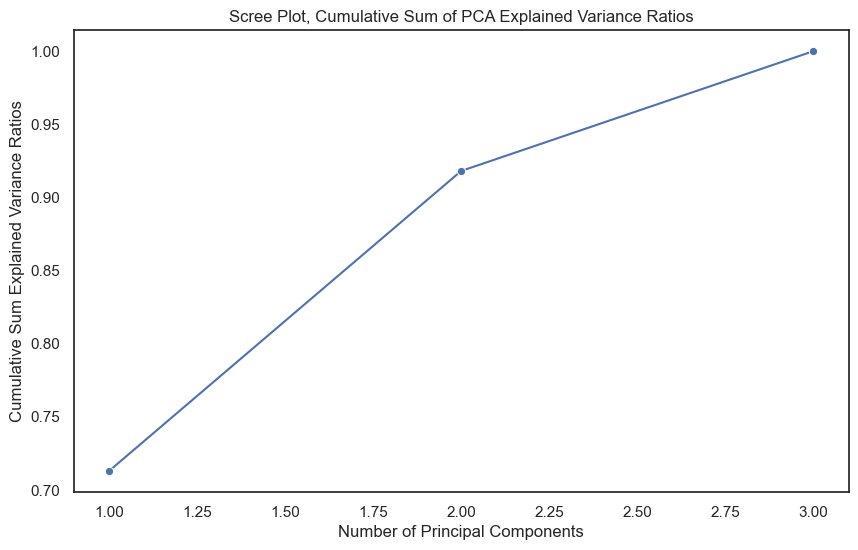

In [720]:
exp_var_df_scree_plot = scree_plot(exp_var_df)
exp_var_df_scree_plot.savefig(f'{project_data_exports_path}/exp_var_df_scree_plot.png', dpi=300, bbox_inches='tight')

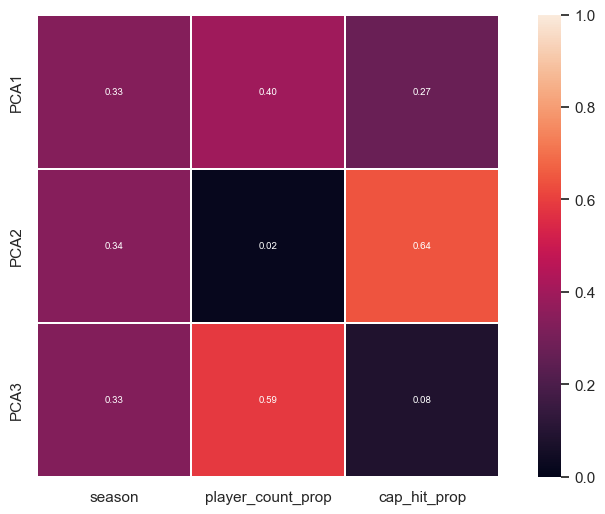

In [721]:
pca_matrix_heatmap = pca_matrix_heatmap(spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=False)
pca_matrix_heatmap.savefig(f'{project_data_exports_path}/pca_matrix_heatmap.png', dpi=300, bbox_inches='tight')

## KMeans

In [722]:
kmc_inertias = inertia_scores(spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=False)
kmc_inertias

[1343.9999999999995,
 748.1287747101403,
 494.5390015104962,
 355.7994667442383,
 283.8631897032201,
 240.23855798869153,
 213.5908212277264,
 189.32633405045806,
 171.42637956397536,
 157.9153767513,
 145.6708310229272,
 135.69347282846502,
 126.0316957469401,
 120.91465360954052,
 113.27852622854267]

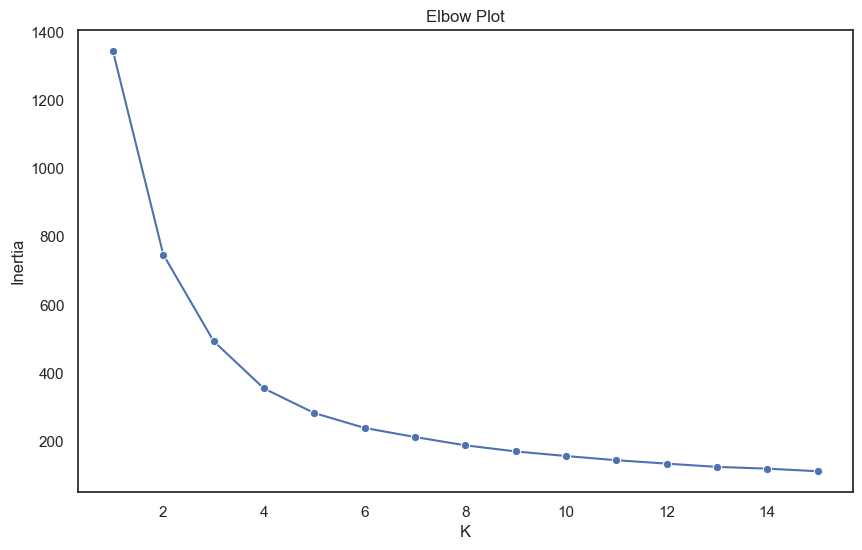

In [723]:
kmc_elbow_plot = elbow_plot(kmc_inertias)
kmc_elbow_plot.savefig(f'{project_data_exports_path}/kmc_elbow_plot.png', dpi=300, bbox_inches='tight')

In [724]:
kmc_silhouettes = kmc_silhouette_scores(spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=False)
kmc_silhouettes

,silhouette_score,k
0,0.415396,2
1,0.359371,3
2,0.366893,4
3,0.361390,5
4,0.357731,6
5,0.340581,7
6,0.334795,8
7,0.326589,9
8,0.287918,10
9,0.293973,11


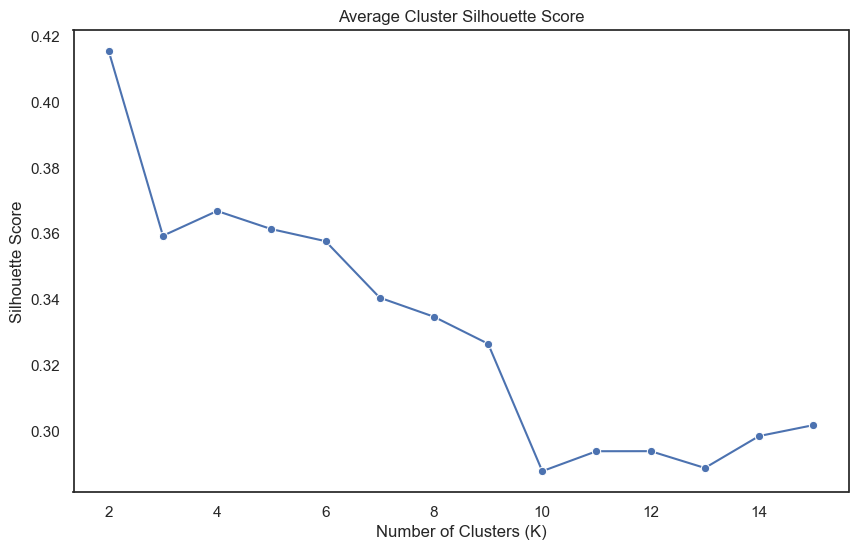

In [725]:
kmc_silhouette_score_plot = kmc_silhouette_score_plot(kmc_silhouettes)
kmc_silhouette_score_plot.savefig(f'{project_data_exports_path}/kmc_silhouette_score_plot.png', dpi=300, bbox_inches='tight')

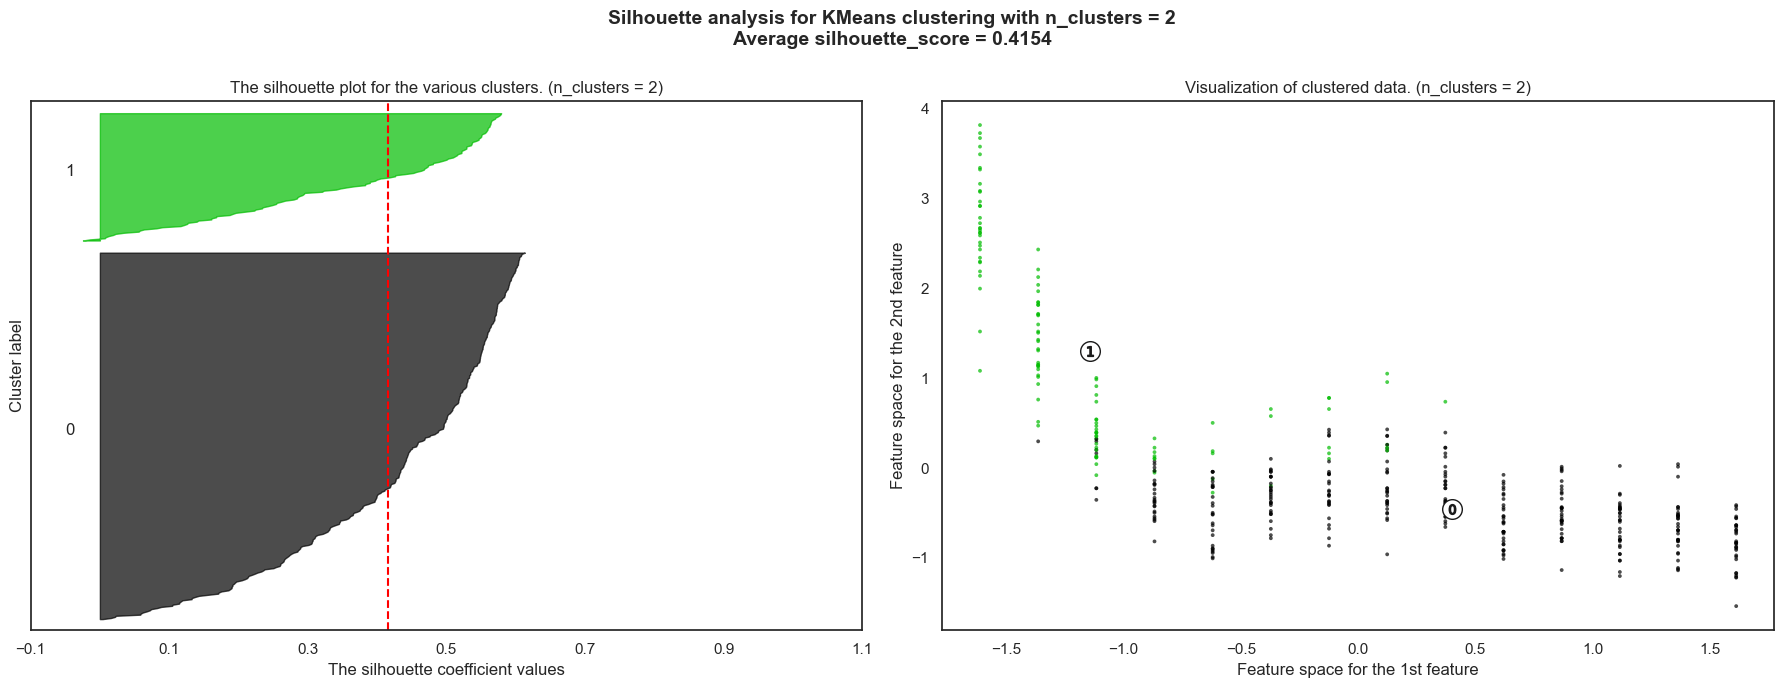

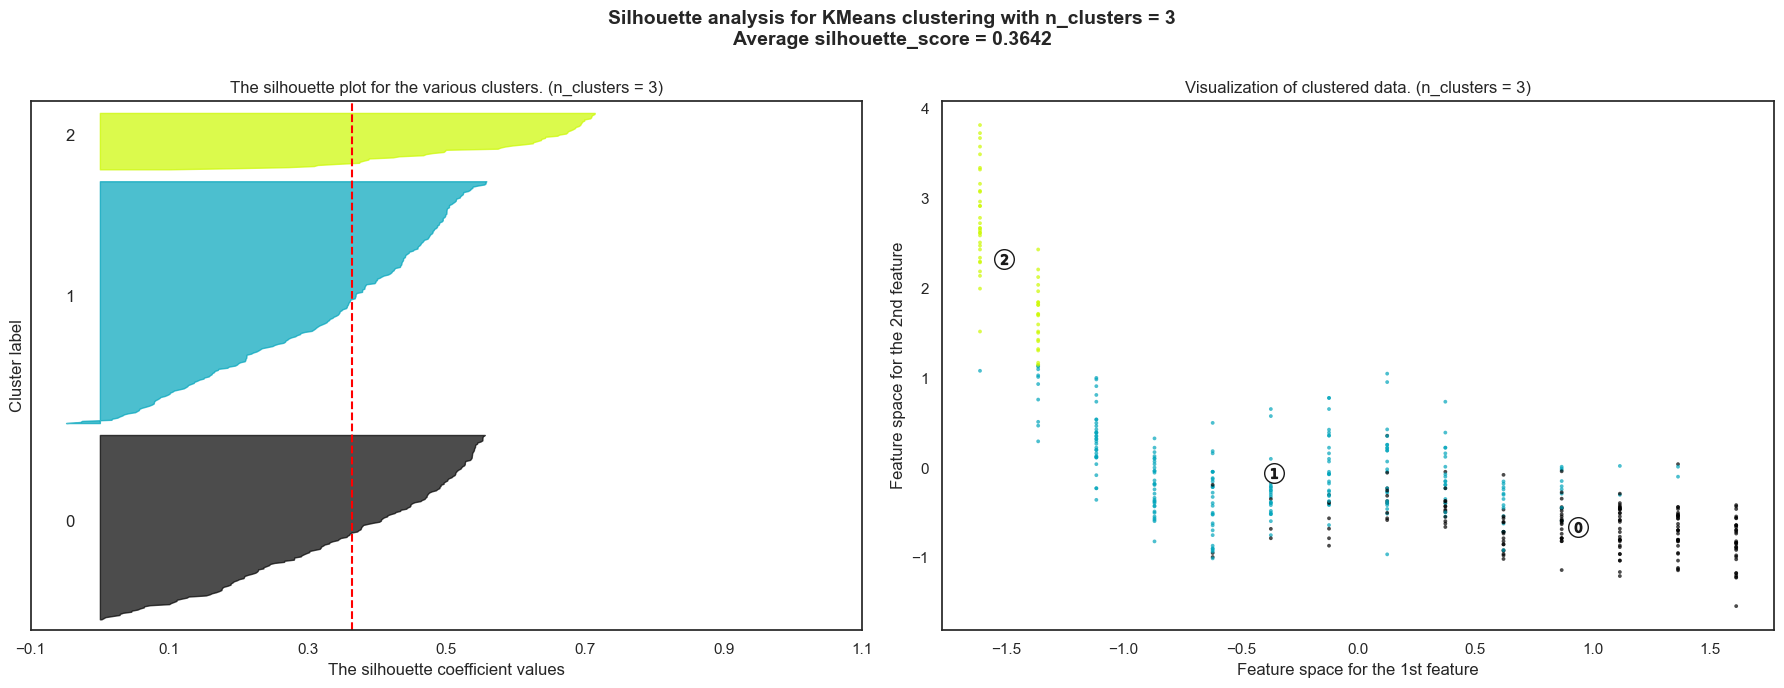

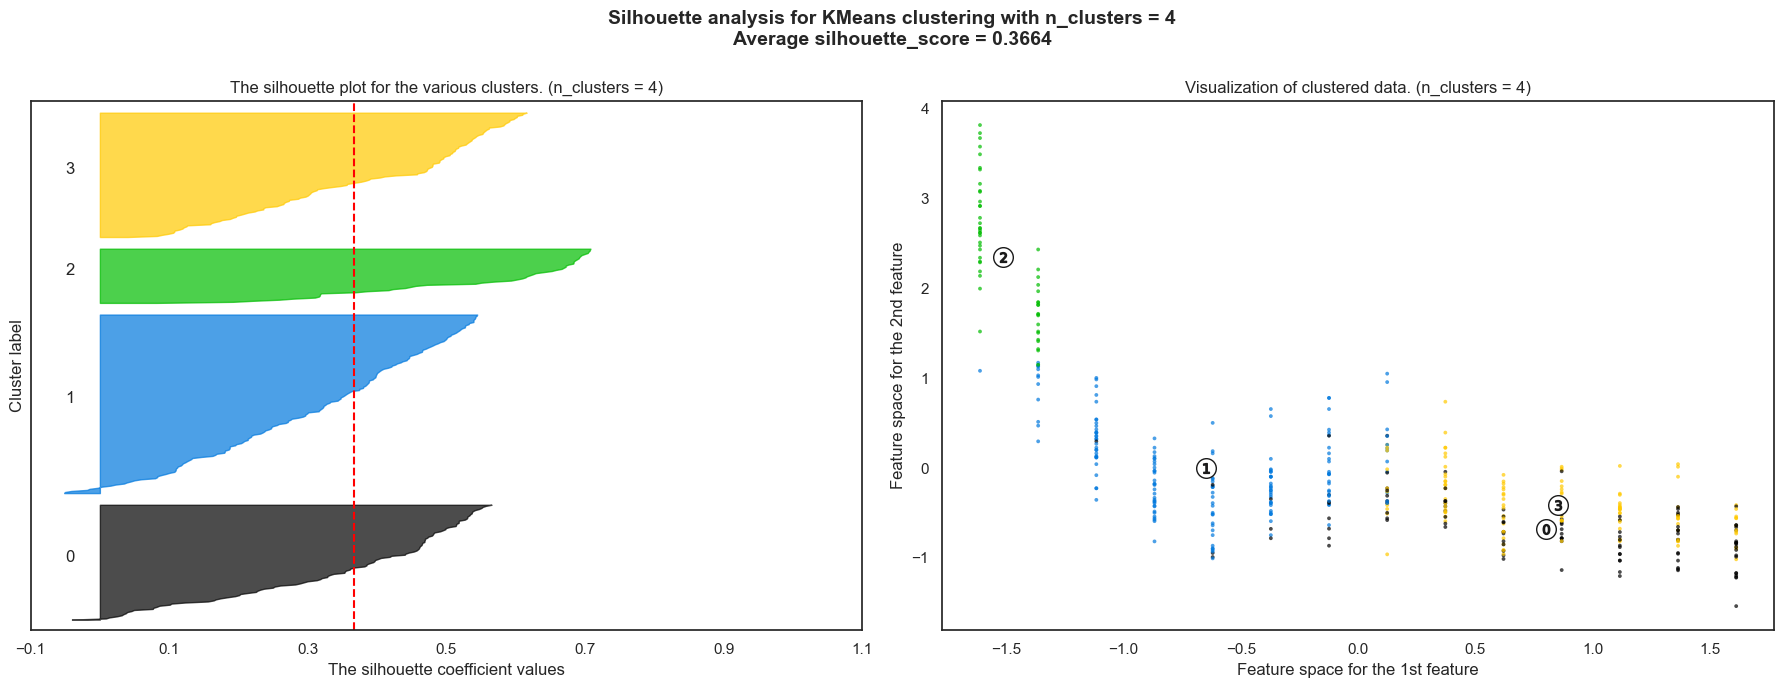

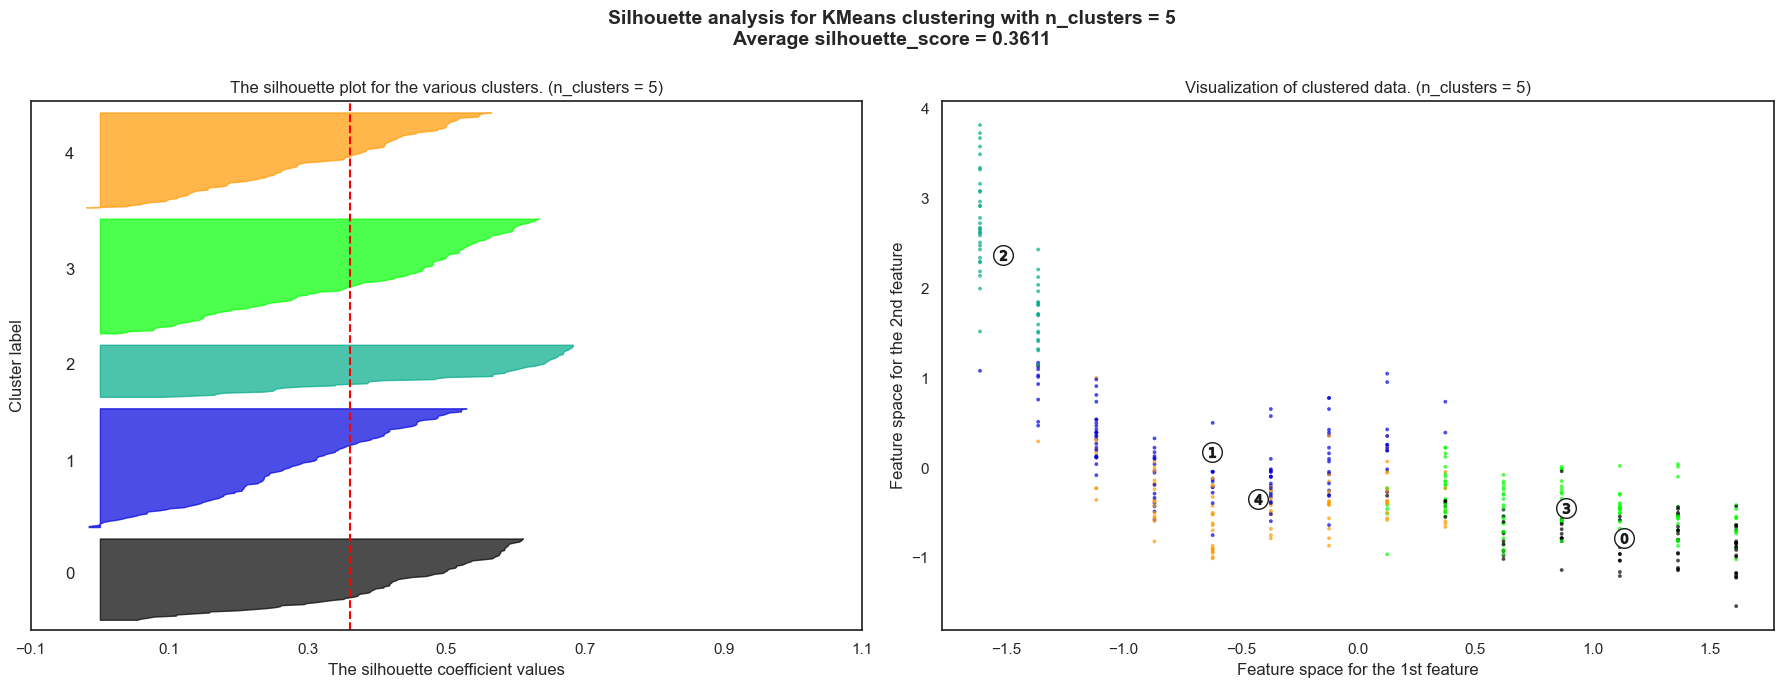

In [726]:
for n_clusters in [2, 3, 4, 5]:
    # Generate the silhouette analysis plot
    fig = kmc_silhouette_analysis_plot(
        spotrac_clustering_df,
        n_clusters,
        spotrac_clustering_numerical_cols,
        spotrac_clustering_categorical_cols,
        use_categorical_features=False,
        use_pca=False,
        n_components=3,
        title_suffix=f"(n_clusters = {n_clusters})"
    )

    # Save the figure
    fig_path = project_data_exports_path / f"silhouette_plot_n_clusters_{n_clusters}.png"
    fig.savefig(fig_path, dpi=300, bbox_inches="tight")

In [727]:
(
    kmc_pca_cluster_df,
    kmc_centroids_x,
    kmc_centroids_y,
    # kmc_centroids_z
) = kmc_pca_cluster_df(df=spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=True, components=2, clusters=4) # used 3 clusters when ed was included
kmc_pca_cluster_df

,pc_1,pc_2,pc_3,label
0,3.276451,0.093393,None,2
1,1.952219,-0.882356,None,2
2,1.141705,-0.478526,None,3
3,0.141941,-0.668509,None,3
4,0.658642,0.333608,None,3
...,...,...,...,...
443,-0.919616,0.110583,None,1
444,-1.567532,-0.569925,None,1
445,-0.729947,0.944118,None,0
446,-1.765917,0.088983,None,1


In [728]:
kmc_labeled_df = merge_cluster_df(spotrac_nfl_team_season_roster_active_df, kmc_pca_cluster_df)
kmc_labeled_df.to_csv(f'{project_data_exports_path}/kmc_labeled_df.csv')
kmc_labeled_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct,pc_1,pc_2,pc_3,label
0,cleveland-browns,2024,active,52,129961235.0,0.279570,0.523752,3,14,0.176,258,435,-177,0.333,0.250,-0.081421,1.859931,None,0
1,carolina-panthers,2017,active,51,144363005.0,0.421488,0.822824,11,5,0.688,363,327,36,0.500,0.583,-0.673171,1.536925,None,0
2,carolina-panthers,2016,active,53,98999535.0,0.398496,0.711041,6,10,0.375,369,402,-33,0.167,0.417,-0.232247,1.075286,None,0
3,carolina-panthers,2015,active,53,121004274.0,0.414062,0.833188,15,1,0.938,500,308,192,0.833,0.917,0.222676,0.749337,None,0
4,denver-broncos,2024,active,52,150535729.0,0.351351,0.597034,10,7,0.588,425,311,114,0.500,0.500,-0.957443,1.122577,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,washington-commanders,2020,active,53,131896856.0,0.360544,0.682924,7,9,0.438,335,329,6,0.667,0.417,NaN,NaN,NaN,NaN
444,washington-commanders,2021,active,56,108019140.0,0.366013,0.558046,7,10,0.412,335,434,-99,0.333,0.500,NaN,NaN,NaN,NaN
445,washington-commanders,2022,active,53,160094196.0,0.381295,0.769431,8,8,0.500,321,343,-22,0.417,0.458,NaN,NaN,NaN,NaN
446,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167,NaN,NaN,NaN,NaN


In [729]:
kmc_grouped_clusters_labeled_df = kmc_labeled_df.groupby(['label'], observed=True).agg({
    'label': 'count',
    'player_count_prop': 'mean',
    'cap_hit_prop': 'mean',
    'pct': 'mean',
    'div_win_pct': 'mean',
    'conf_win_pct': 'mean',
    'w': 'mean',
    'l': 'mean',
    'pf': 'mean',
    'pa': 'mean',
    'net_pts': 'mean'
}).rename(columns={'label': 'count'}).reset_index().rename(columns={'label': 'cluster'})

kmc_grouped_clusters_labeled_df.to_csv(f'{project_data_exports_path}/kmc_grouped_clusters_labeled_df.csv')
kmc_grouped_clusters_labeled_df

,cluster,count,player_count_prop,cap_hit_prop,pct,div_win_pct,conf_win_pct,w,l,pf,pa,net_pts
0,0,65,0.371930,0.711278,0.482892,0.475677,0.483354,7.907692,8.507692,371.538462,374.969231,-3.430769
1,1,50,0.384667,0.730273,0.531000,0.570000,0.533300,8.720000,7.680000,379.520000,359.060000,20.460000
2,2,35,0.589003,0.822322,0.482257,0.471371,0.478486,7.685714,8.257143,353.400000,361.200000,-7.800000
3,3,74,0.432706,0.727544,0.502892,0.516892,0.501649,8.067568,7.986486,375.472973,377.337838,-1.864865


In [730]:
# kmc_grouped_clusters_position_df = kmc_labeled_df.groupby(['label', 'position_level_two'], observed=True).agg({
#     'label': 'count',
#     'player_count_prop': 'mean',
#     'cap_hit_prop': 'mean',
#     'pct': 'mean',
#     'div_win_pct': 'mean',
#     'conf_win_pct': 'mean',
#     'w': 'mean',
#     'l': 'mean',
#     'pf': 'mean',
#     'pa': 'mean',
#     'net_pts': 'mean'
# }).rename(columns={'label': 'count'}).reset_index().rename(columns={'label': 'cluster'}).sort_values(by=['cluster', 'position_level_two'], ascending=[True, True])
#
# kmc_grouped_clusters_position_df.to_csv(f'{project_data_exports_path}/kmc_grouped_clusters_position_df.csv')
# kmc_grouped_clusters_position_df

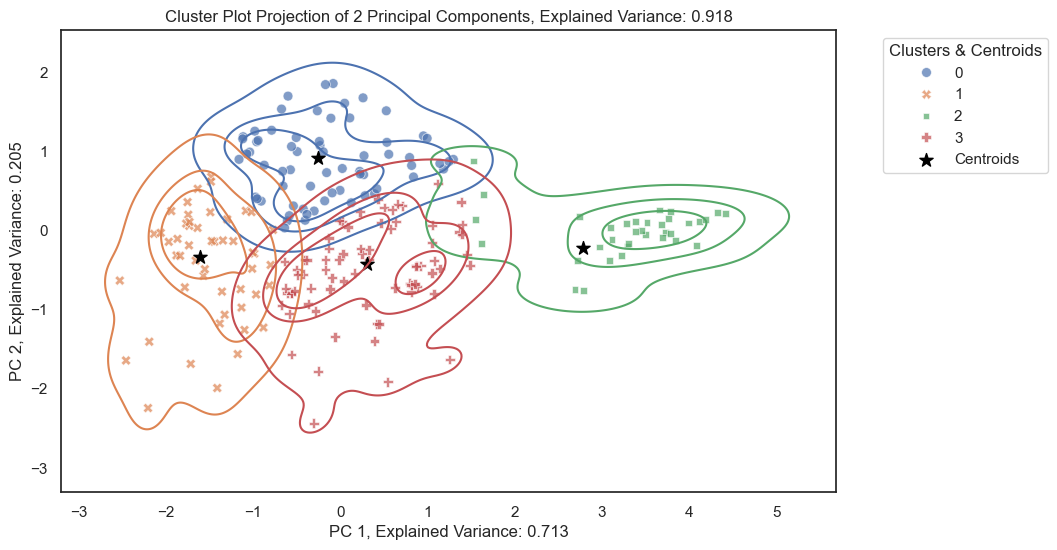

In [731]:
kmc_pc12_cluster_plot = kmc_pc12_shaded_cluster_plot(
    kmc_labeled_df,
    exp_var_df,
    kmc_centroids_x,
    kmc_centroids_y,
    show_kde=False,
    show_contour=True,
    show_hull=False,
    show_voronoi=False,
    show_ellipse=False
)
kmc_pc12_cluster_plot.savefig(f'{project_data_exports_path}/kmc_pc12_cluster_plot.png', dpi=300, bbox_inches='tight')

## DBSCAN

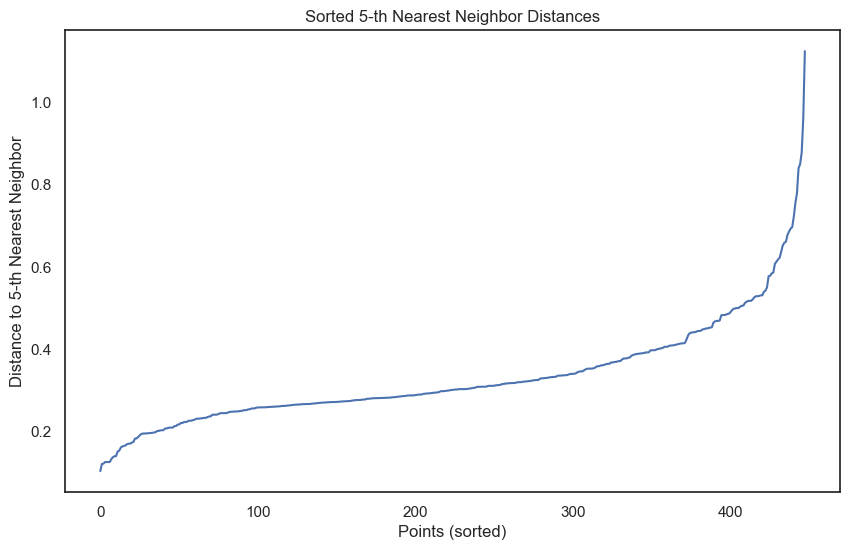

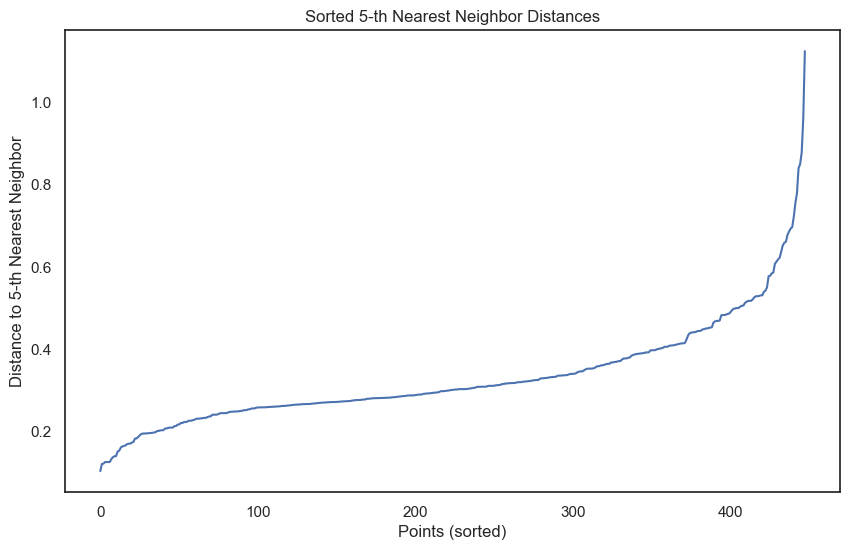

In [732]:
dbscan_density_fig = explore_data_density(spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols)
dbscan_density_fig.savefig(f'{project_data_exports_path}/dbscan_density_fig.png', dpi=300, bbox_inches='tight')
dbscan_density_fig

In [733]:
dbscan_silhouettes = dbscan_silhouette_scores(
    spotrac_clustering_df,
    numerical_features=spotrac_clustering_numerical_cols,
    categorical_features=spotrac_clustering_categorical_cols,
    use_categorical_features=False,
    eps_values=np.linspace(0.4, 0.8, 10),
    min_samples_values=[4, 5, 6, 7, 8],
    use_pca=True,
    n_components=2
)
dbscan_silhouettes

,eps,min_samples,silhouette_score
0,0.400000,4,NaN
1,0.400000,5,NaN
2,0.400000,6,NaN
3,0.400000,7,NaN
4,0.400000,8,NaN
5,0.444444,4,NaN
6,0.444444,5,NaN
7,0.444444,6,NaN
8,0.444444,7,NaN
9,0.444444,8,NaN


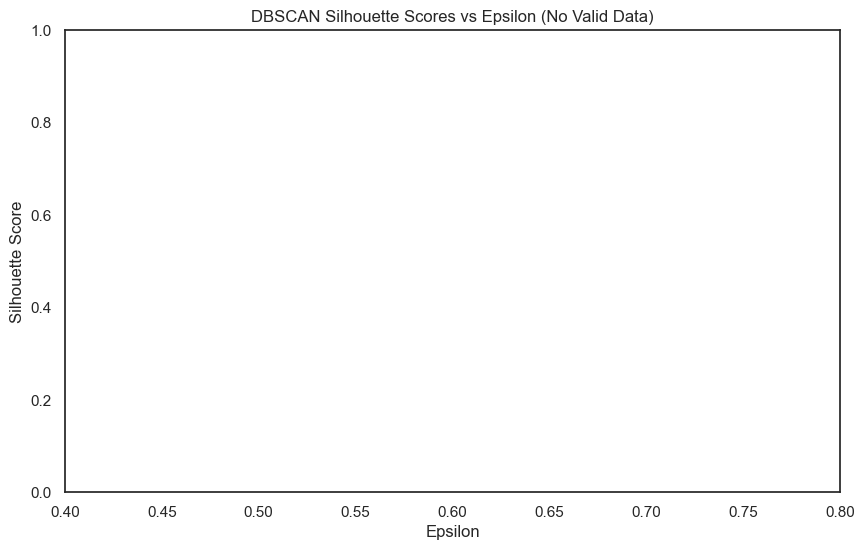

In [734]:
dbscan_silhouette_score_plot = dbscan_silhouette_score_plot(dbscan_silhouettes, eps_range=(0.4, 0.8))
dbscan_silhouette_score_plot.savefig(f'{project_data_exports_path}/dbscan_silhouette_score_plot.png', dpi=300, bbox_inches='tight')

In [735]:
dbscan_best_params = dbscan_silhouettes.loc[dbscan_silhouettes['silhouette_score'].idxmax()]
dbscan_best_eps = dbscan_best_params['eps']
dbscan_best_min_samples = int(dbscan_best_params['min_samples'])
print(f"Best parameters: eps={dbscan_best_eps}, min_samples={dbscan_best_min_samples}, silhouette_score={dbscan_best_params['silhouette_score']}")

/var/folders/kk/54xn9lv90wq5vmw11pj1svvr0000gn/T/ipykernel_96297/2079741070.py:1: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



KeyError: nan

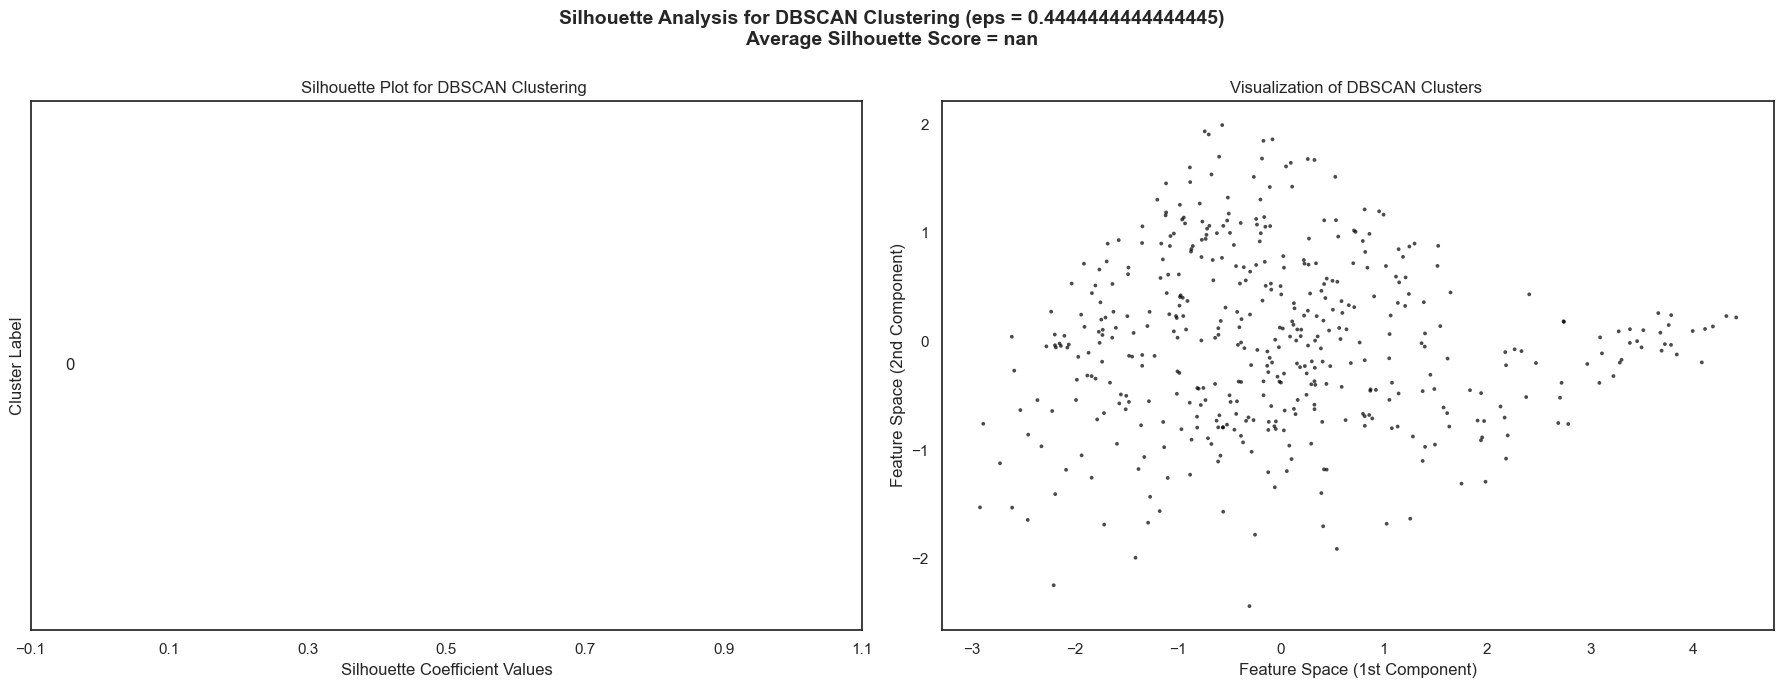

In [661]:
dbscan_silhouette_analysis_plot = dbscan_silhouette_analysis_plot(
    spotrac_clustering_df,
    eps=dbscan_best_eps,
    min_samples=dbscan_best_min_samples,
    numerical_features=spotrac_clustering_numerical_cols,
    categorical_features=spotrac_clustering_categorical_cols,
    use_categorical_features=False,
    use_pca=True,
    n_components=2,
)
dbscan_silhouette_analysis_plot.savefig(f'{project_data_exports_path}/dbscan_silhouette_analysis_plot.png', dpi=300, bbox_inches='tight')

In [582]:
dbscan_pca_cluster_df = dbscan_pca_cluster_df(
    spotrac_clustering_df,
    spotrac_clustering_numerical_cols,
    spotrac_clustering_categorical_cols,
    components=2,
    eps=dbscan_best_eps,
    min_samples=dbscan_best_min_samples,
    use_categorical_features=False,
    random_state=0
)
dbscan_pca_cluster_df

,label,pc_1,pc_2
0,0,3.276451,0.093393
1,0,1.952219,-0.882356
2,0,1.141705,-0.478526
3,0,0.141941,-0.668509
4,0,0.658642,0.333608
...,...,...,...
443,0,-0.919616,0.110583
444,0,-1.567532,-0.569925
445,0,-0.729947,0.944118
446,0,-1.765917,0.088983


In [583]:
dbscan_labeled_df = merge_cluster_df(spotrac_nfl_team_season_roster_active_df, dbscan_pca_cluster_df)
dbscan_labeled_df.to_csv(f'{project_data_exports_path}/dbscan_labeled_df.csv')
dbscan_labeled_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct,label,pc_1,pc_2
0,dallas-cowboys,2012,active,58,96795939.0,0.522523,0.735656,8,8,0.500,376,400,-24,0.500,0.417,-1,-0.305020,-2.434978
1,indianapolis-colts,2020,active,53,187851538.0,0.392593,0.811855,11,5,0.688,451,362,89,0.667,0.583,-1,-0.559465,-1.566313
2,denver-broncos,2022,active,53,108893408.0,0.302857,0.514969,5,12,0.294,287,359,-72,0.167,0.250,-1,-2.203535,-2.243094
3,atlanta-falcons,2018,active,53,141338061.0,0.481818,0.813902,7,9,0.438,414,423,-9,0.667,0.583,-1,1.254385,-1.630413
4,cleveland-browns,2012,active,61,103841976.0,0.670330,0.815402,5,11,0.313,302,368,-66,0.333,0.417,-1,-0.250853,-1.777832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,washington-commanders,2020,active,53,131896856.0,0.360544,0.682924,7,9,0.438,335,329,6,0.667,0.417,NaN,NaN,NaN
444,washington-commanders,2021,active,56,108019140.0,0.366013,0.558046,7,10,0.412,335,434,-99,0.333,0.500,NaN,NaN,NaN
445,washington-commanders,2022,active,53,160094196.0,0.381295,0.769431,8,8,0.500,321,343,-22,0.417,0.458,NaN,NaN,NaN
446,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167,NaN,NaN,NaN


In [585]:
dbscan_grouped_clusters_labeled_df = dbscan_labeled_df.groupby(['label'], observed=True).agg({
    'label': 'count',
    'player_count_prop': 'mean',
    'cap_hit_prop': 'mean',
    'pct': 'mean',
    'div_win_pct': 'mean',
    'conf_win_pct': 'mean',
    'w': 'mean',
    'l': 'mean',
    'pf': 'mean',
    'pa': 'mean',
    'net_pts': 'mean'
}).rename(columns={'label': 'count'}).reset_index().rename(columns={'label': 'cluster'})

dbscan_grouped_clusters_labeled_df.to_csv(f'{project_data_exports_path}/dbscan_grouped_clusters_labeled_df.csv')
dbscan_grouped_clusters_labeled_df

,cluster,count,player_count_prop,cap_hit_prop,pct,div_win_pct,conf_win_pct,w,l,pf,pa,net_pts
0,-1,6,0.495378,0.760489,0.507667,0.555667,0.513833,8.166667,8.000000,385.166667,366.833333,18.333333
1,0,218,0.426935,0.737630,0.499931,0.508408,0.499399,8.105505,8.114679,371.417431,370.137615,1.279817


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide

/var/folders/kk/54xn9lv90wq5vmw11pj1svvr0000gn/T/ipykernel_96297/1939825624.py:40: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply



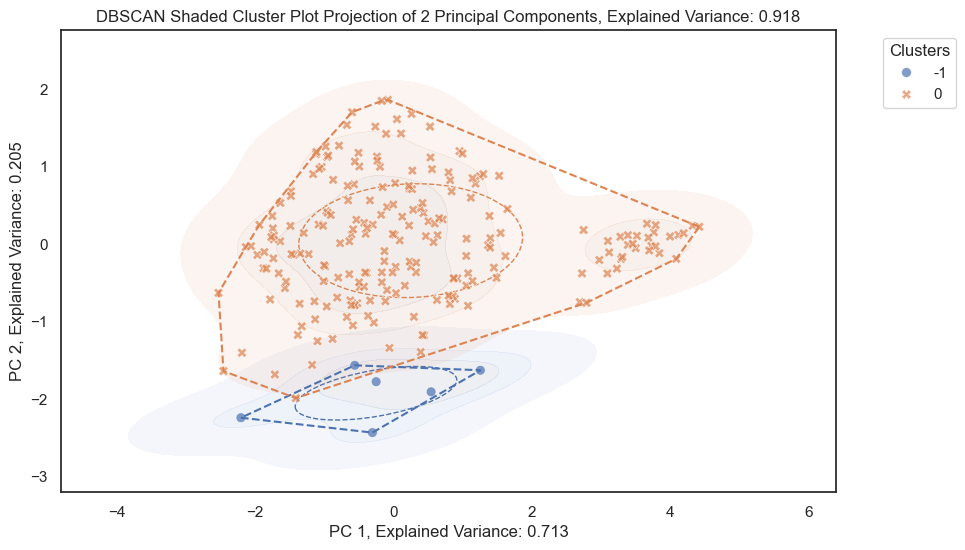

In [589]:
dbscan_pc12_cluster_plot = dbscan_shaded_cluster_plot(
    dbscan_labeled_df,
    exp_var_df,
    show_kde=True,
    show_hull=True,
    show_ellipse=True
)
dbscan_pc12_cluster_plot.savefig(f'{project_data_exports_path}/dbscan_pc12_cluster_plot.png', dpi=300, bbox_inches='tight')


## GMM

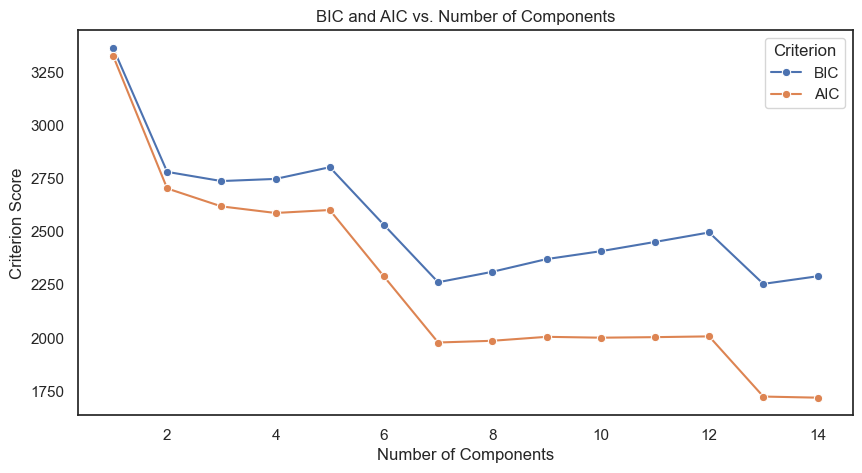

In [196]:
gmm_bic_aic_plot = plot_gmm_criteria(df=spotrac_clustering_df, max_components=14, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=False
                                     )
gmm_bic_aic_plot.savefig(f'{project_data_exports_path}/gmm_bic_aic_plot.png', dpi=300, bbox_inches='tight')

In [197]:
(
    gmm_pca_cluster_df,
    gmm_centroids_x,
    gmm_centroids_y,
    # gmm_centroids_z
 ) = gmm_pca_cluster_df(df=spotrac_clustering_df, numerical_features=spotrac_clustering_numerical_cols, categorical_features=spotrac_clustering_categorical_cols, use_categorical_features=True, components=2, clusters=4)
gmm_pca_cluster_df

,pc_1,pc_2,pc_3,label,cluster_0_probability,cluster_1_probability,cluster_2_probability,cluster_3_probability
0,3.276451,0.093393,None,2,6.025515e-08,6.709817e-28,9.994595e-01,0.000540
1,1.952219,-0.882356,None,2,1.482405e-05,5.722711e-20,9.807761e-01,0.019209
2,1.141705,-0.478526,None,3,6.469617e-03,3.335881e-11,6.978797e-02,0.923742
3,0.141941,-0.668509,None,3,6.019631e-03,2.391480e-06,3.966712e-04,0.993581
4,0.658642,0.333608,None,3,1.868514e-01,5.240213e-06,1.407647e-08,0.813143
...,...,...,...,...,...,...,...,...
443,-0.919616,0.110583,None,1,1.919134e-01,4.602038e-01,8.588864e-15,0.347883
444,-1.567532,-0.569925,None,1,1.212143e-03,7.721165e-01,6.680176e-12,0.226671
445,-0.729947,0.944118,None,0,6.755802e-01,3.046465e-01,1.856928e-24,0.019773
446,-1.765917,0.088983,None,1,8.150495e-03,9.763483e-01,1.586380e-20,0.015501


In [198]:
gmm_labeled_df = merge_cluster_df(spotrac_nfl_team_season_roster_active_df, gmm_pca_cluster_df)
gmm_labeled_df.to_csv(f'{project_data_exports_path}/gmm_labeled_df.csv')
gmm_labeled_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,...,div_win_pct,conf_win_pct,pc_1,pc_2,pc_3,label,cluster_0_probability,cluster_1_probability,cluster_2_probability,cluster_3_probability
0,cleveland-browns,2024,active,52,129961235.0,0.279570,0.523752,3,14,0.176,...,0.333,0.250,-0.081421,1.859931,None,0,0.876431,0.118920,1.802786e-33,0.004649
1,detroit-lions,2023,active,52,173331167.0,0.329114,0.775848,12,5,0.706,...,0.667,0.667,-0.655290,0.563123,None,0,0.628235,0.244094,1.480039e-18,0.127671
2,detroit-lions,2022,active,53,157043784.0,0.331250,0.732399,9,8,0.529,...,0.833,0.583,-0.156406,0.733131,None,0,0.807439,0.023856,2.129479e-17,0.168705
3,denver-broncos,2024,active,52,150535729.0,0.351351,0.597034,10,7,0.588,...,0.500,0.500,-0.957443,1.122577,None,0,0.561675,0.433623,4.677440e-29,0.004703
4,denver-broncos,2023,active,53,173358141.0,0.360544,0.747962,8,9,0.471,...,0.500,0.417,-0.571557,0.769342,None,0,0.748733,0.186927,9.522049e-21,0.064340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,washington-commanders,2020,active,53,131896856.0,0.360544,0.682924,7,9,0.438,...,0.667,0.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,washington-commanders,2021,active,56,108019140.0,0.366013,0.558046,7,10,0.412,...,0.333,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,washington-commanders,2022,active,53,160094196.0,0.381295,0.769431,8,8,0.500,...,0.417,0.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,...,0.000,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
gmm_grouped_clusters_labeled_df = gmm_labeled_df.groupby(['label'], observed=True).agg({
    'label': 'count',
    'player_count_prop': 'mean',
    'cap_hit_prop': 'mean',
    'pct': 'mean',
    'div_win_pct': 'mean',
    'conf_win_pct': 'mean',
    'w': 'mean',
    'l': 'mean',
    'pf': 'mean',
    'pa': 'mean',
    'net_pts': 'mean'
}).rename(columns={'label': 'count'}).reset_index().rename(columns={'label': 'cluster'})

gmm_grouped_clusters_labeled_df.to_csv(f'{project_data_exports_path}/gmm_grouped_clusters_labeled_df.csv')
gmm_grouped_clusters_labeled_df

,cluster,count,player_count_prop,cap_hit_prop,pct,div_win_pct,conf_win_pct,w,l,pf,pa,net_pts
0,0,39,0.375858,0.720892,0.490538,0.478641,0.489282,8.076923,8.410256,367.615385,370.692308,-3.076923
1,1,39,0.377623,0.719418,0.520256,0.546974,0.525615,8.564103,7.871795,380.333333,366.282051,14.051282
2,2,32,0.591773,0.823116,0.494281,0.489531,0.497281,7.875000,8.062500,356.562500,359.593750,-3.031250
3,3,114,0.418611,0.726793,0.498184,0.513184,0.495246,8.026316,8.105263,374.561404,374.052632,0.508772


In [200]:
# gmm_grouped_clusters_position_df = gmm_labeled_df.groupby(['label', 'position_level_two'], observed=True).agg({
#     'label': 'count',
#     'cap_hit_pct_sum': 'mean',
#     'pct': 'mean',
#     'div_win_pct': 'mean',
#     'conf_win_pct': 'mean',
#     'w': 'mean',
#     'l': 'mean',
#     'pf': 'mean',
#     'pa': 'mean',
#     'net_pts': 'mean'
# }).rename(columns={'label': 'count'}).reset_index().rename(columns={'label': 'cluster'}).sort_values(by=['cluster', 'position_level_two'], ascending=[True, True])
#
# gmm_grouped_clusters_position_df.to_csv(f'{project_data_exports_path}/gmm_grouped_clusters_position_df.csv')
# gmm_grouped_clusters_position_df

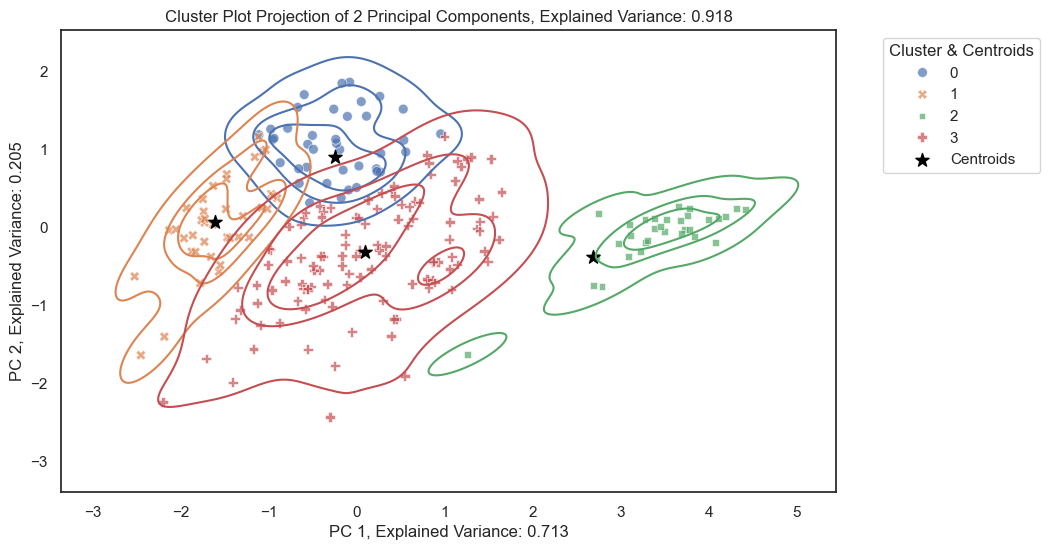

In [201]:
gmm_pc12_cluster_plot = gmm_pc12_shaded_cluster_plot(
    gmm_labeled_df,
    exp_var_df,
    gmm_centroids_x,
    gmm_centroids_y,
    show_kde=False,
    show_contour=True,
    show_hull=False,
    show_voronoi=False,
    show_ellipse=False
)
gmm_pc12_cluster_plot.savefig(f'{project_data_exports_path}/gmm_pc12_cluster_plot.png', dpi=300, bbox_inches='tight')